# **SC1015 Mini Project** - **Laptop Price Prediction**

### AY2023/24 ECDS1 Group 5
---

# **Problem Definition**

* How do different factors affect the price of laptop?
* Which model would be the best to predict laptop price?

---
# **Essential Libraries**

Let's import the necessary libraries.

In [ ]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set()                                  # this is to set the default Seaborn style for graphics



---

# **Set up: Import the Dataset**

We import the dataset which is in csv format with `read_csv` from the pandas library and take a quick look at the data using the `head` function.

In [ ]:
laptopData = pd.read_csv('laptop_cleaned2.csv')
laptopData.head()

Unnamed: 0                                               Name    Brand  \
0           0  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...       HP   
1           1  Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...   Lenovo   
2           2  HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...       HP   
3           3  Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...  Samsung   
4           4  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...    Tecno   

   Price  Rating Processor_brand Processor_name Processor_variant  \
0  50399    4.30             AMD    AMD Ryzen 5             5600H   
1  26690    4.45             AMD    AMD Ryzen 3             7320U   
2  37012    4.65           Intel  Intel Core i3             1215U   
3  69990    4.75           Intel  Intel Core i5             1240P   
4  23990    4.25           Intel  Intel Core i3            1115G4   

   Processor_gen  Core_per_processor  ...           Graphics_name  \
0            5.0                 6.0  ...     AMD Radeon RX 6500M   
1            7.0                 4.0  ...     AMD Radeon Graphics   
2           12.0                 6.0  ...      Intel UHD Graphics   
3           12.0                12.0  ...  Intel Iris Xe Graphics   
4           11.0                 2.0  ...      Intel UHD Graphics   

   Graphics_brand  Graphics_GB  Graphics_integreted  Display_size_inches  \
0             AMD          4.0                False                 15.6   
1             AMD          NaN                False                 15.6   
2           Intel          NaN                False                 15.6   
3           Intel          NaN                False                 13.3   
4           Intel          NaN                False                 15.6   

   Horizontal_pixel Vertical_pixel     ppi Touch_screen Operating_system  
0              1920           1080  141.21         True    Windows 11 OS  
1              1920           1080  141.21        False    Windows 11 OS  
2              1920           1080  141.21        False    Windows 11 OS  
3              1080           1920  165.63        False    Windows 11 OS  
4              1920           1080  141.21        False    Windows 11 OS  

[5 rows x 29 columns]

Our dataset is from Kaggle: "Laptop sales price prediction 2024" by *Siddiqui Faiz Naeem*\
Source: https://www.kaggle.com/datasets/siddiquifaiznaeem/laptop-sales-price-prediction-dataset-2024 \

> **Name**: Name of the laptop model.\
> **Brand**: Brand of the laptop.\
> **Price**: Price of the laptop.\
> **Rating**: Rating of the laptop.\
> **Processor_brand**: Brand of the laptop's processor.\
> **Processor_name**: Name of the laptop's processor.\
> **Processor_variant**: Variant of the laptop's processor.\
> **Processor_gen**: Generation of the laptop's processor.\
> **Core_per_processor**: Number of cores per processor.\
> **Total_processor**: Total number of processors.\
> **Execution_units**: Number of execution units.\
> **Low_Power_Cores**: Number of low-power cores.\
> **Energy_Efficient_Units**: Indicates if the laptop has energy-efficient units.\
> **Threads**: Number of threads.\
> **RAM_GB**: RAM capacity of the laptop in gigabytes.\
> **RAM_type**: Type of RAM.\
> **Storage_capacity_GB**: Storage capacity of the laptop in gigabytes.\
> **Storage_type**: Type of storage.\
> **Graphics_name**: Name of the laptop's graphics.\
> **Graphics_brand**: Brand of the laptop's graphics.\
> **Graphics_GB**: Graphics capacity in gigabytes.\
> **Graphics_integrated**: Indicates if the laptop has integrated graphics.\
> **Display_size_inches**: Size of the laptop's display in inches.\
> **Horizontal_pixel**: Number of horizontal pixels.\
> **Vertical_pixel**: Number of vertical pixels.\
> **ppi**: Pixels per inch.\
> **Touch_screen**: Indicates if the laptop has a touch screen.\
> **Operating_system**: Operating system of the laptop.

Let's have an overview of the dataset, i.e. the `type` and `shape`.

In [ ]:
print("Data type:\t", type(laptopData))
print("Data dims:\t", laptopData.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dims:	 (1020, 29)


We check the data type of each column with `info`.

In [ ]:
laptopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   Name                    1020 non-null   object 
 2   Brand                   1020 non-null   object 
 3   Price                   1020 non-null   int64  
 4   Rating                  1020 non-null   float64
 5   Processor_brand         1020 non-null   object 
 6   Processor_name          1020 non-null   object 
 7   Processor_variant       996 non-null    object 
 8   Processor_gen           891 non-null    float64
 9   Core_per_processor      1008 non-null   float64
 10  Total_processor         573 non-null    float64
 11  Execution_units         573 non-null    float64
 12  Low_Power_Cores         1020 non-null   float64
 13  Energy_Efficient_Units  1020 non-null   int64  
 14  Threads                 972 non-null    



---
# **Data Preparation & Cleaning**


We will now prepare and clean our dataset.

First up, we want to ensure all the datas are unique as we do not want duplicated data.

In [ ]:
print("Total number of rows:\t\t", len(laptopData))
print("Total number of unique Name:\t", len(laptopData["Name"].unique()))

Total number of rows:		 1020
Total number of unique Name:	 1020


As they are 1020 rows and 1020 unique names, this shows that our data is unique.

We remove `Unnamed: 0` since it has no meaning. The column `Name` is also removed from the dataset as it is hard to model `Name` to predict `Price`.

In [ ]:
laptopData = laptopData.drop(['Unnamed: 0','Name'], axis=1)
laptopData

Brand   Price  Rating Processor_brand Processor_name  \
0          HP   50399    4.30             AMD    AMD Ryzen 5   
1      Lenovo   26690    4.45             AMD    AMD Ryzen 3   
2          HP   37012    4.65           Intel  Intel Core i3   
3     Samsung   69990    4.75           Intel  Intel Core i5   
4       Tecno   23990    4.25           Intel  Intel Core i3   
...       ...     ...     ...             ...            ...   
1015      MSI  247999    4.45           Intel  Intel Core i9   
1016      MSI  292990    4.20           Intel  Intel Core i9   
1017       HP   58800    4.40             AMD    AMD Ryzen 5   
1018     Asus   54999    4.25             AMD    AMD Ryzen 5   
1019     Dell   94490    4.05           Intel  Intel Core i5   

     Processor_variant  Processor_gen  Core_per_processor  Total_processor  \
0                5600H            5.0                 6.0              NaN   
1                7320U            7.0                 4.0              NaN   
2                1215U           12.0                 6.0              2.0   
3                1240P           12.0                12.0              4.0   
4               1115G4           11.0                 2.0              NaN   
...                ...            ...                 ...              ...   
1015            13900H           13.0                14.0              6.0   
1016            13900H           13.0                14.0              6.0   
1017             5600H            5.0                 6.0              NaN   
1018             7530U            7.0                 6.0              NaN   
1019             1335U           13.0                10.0              2.0   

      Execution_units  ...            Graphics_name  Graphics_brand  \
0                 NaN  ...      AMD Radeon RX 6500M             AMD   
1                 NaN  ...      AMD Radeon Graphics             AMD   
2                 4.0  ...       Intel UHD Graphics           Intel   
3                 8.0  ...   Intel Iris Xe Graphics           Intel   
4                 NaN  ...       Intel UHD Graphics           Intel   
...               ...  ...                      ...             ...   
1015              8.0  ...  NVIDIA GeForce RTX 4070          NVIDIA   
1016              8.0  ...  NVIDIA GeForce RTX 4070          NVIDIA   
1017              NaN  ...      AMD Radeon RX 5600M             AMD   
1018              NaN  ...           AMD Radeon AMD             AMD   
1019              8.0  ...   Intel Iris Xe Graphics           Intel   

      Graphics_GB  Graphics_integreted Display_size_inches  Horizontal_pixel  \
0             4.0                False                15.6              1920   
1             NaN                False                15.6              1920   
2             NaN                False                15.6              1920   
3             NaN                False                13.3              1080   
4             NaN                False                15.6              1920   
...           ...                  ...                 ...               ...   
1015          8.0                False                17.0              2560   
1016          8.0                False                16.0              3840   
1017          4.0                False                15.6              1920   
1018          NaN                False                16.0              1920   
1019          NaN                False                16.0              1920   

     Vertical_pixel     ppi Touch_screen  Operating_system  
0              1080  141.21         True     Windows 11 OS  
1              1080  141.21        False     Windows 11 OS  
2              1080  141.21        False     Windows 11 OS  
3              1920  165.63        False     Windows 11 OS  
4              1080  141.21        False     Windows 11 OS  
...             ...     ...          ...               ...  
1015           1600  177.58        False     Windows 11 OS  


Next, we check for NULL inputs and deal with them accordingly. The `laptop.isnull().sum()` fuction is used to count the missing values in each column.

In [ ]:
laptopData.isnull().sum()

Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_name              0
Processor_variant          24
Processor_gen             129
Core_per_processor         12
Total_processor           447
Execution_units           447
Low_Power_Cores             0
Energy_Efficient_Units      0
Threads                    48
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_name               2
Graphics_brand              2
Graphics_GB               652
Graphics_integreted         2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
ppi                         0
Touch_screen                0
Operating_system            0
dtype: int64

We can see that there is missing data in columns `Processor_variant`, `Processor_gen`, `Core_per_processor`, `Total_processor`, `Execution_units`,`Threads`, `RAM_type`, `Graphics_name`, `Graphics_brand`, `Graphics_GB`, and `Graphics_integreted`.


Since `Total_processor`, `Execution_units`, and `Graphics_GB` have large number of data missing, we will try to deal with them first to ensure the accuracy of our data.



In [ ]:
correlation_matrix = laptopData[['Price','Core_per_processor', 'Total_processor', 'Execution_units','Graphics_GB']].corr()
print(correlation_matrix)

                       Price  Core_per_processor  Total_processor  \
Price               1.000000            0.713484         0.624849   
Core_per_processor  0.713484            1.000000         0.747524   
Total_processor     0.624849            0.747524         1.000000   
Execution_units     0.533587            0.864156         0.336390   
Graphics_GB         0.818311            0.702463         0.661515   

                    Execution_units  Graphics_GB  
Price                      0.533587     0.818311  
Core_per_processor         0.864156     0.702463  
Total_processor            0.336390     0.661515  
Execution_units            1.000000     0.617562  
Graphics_GB                0.617562     1.000000  


From the correlation matrix, we can see that the correlation of `Core_per_processor` with this 3 variables are quite high. In addition, the correlation between `Price` and `Total_processor` and `Execution_units` are not very high. Therefore, we can remove `Total_processor` and `Execution_units` from the data.\
In the case for `Graphics_GB`, although its correlation with price is high, it has up to 652 null data (more than half of the whole data), so it might affect the accuracy of our results. Sice its correlation with `Core_per_processor` is also quite high and `Core_per_processor` have much lesser missing data, we will remove `Graphics_GB` and keep `Core_per_processor`.

In [ ]:
laptopData = laptopData.drop(['Total_processor','Execution_units','Graphics_GB'], axis=1)
laptopData.isnull().sum()

Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_name              0
Processor_variant          24
Processor_gen             129
Core_per_processor         12
Low_Power_Cores             0
Energy_Efficient_Units      0
Threads                    48
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_name               2
Graphics_brand              2
Graphics_integreted         2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
ppi                         0
Touch_screen                0
Operating_system            0
dtype: int64


Now, for data related to **processor**, we have 6 variables left:
>`Processor_brand`           
`Processor_name`             
`Processor_variant` \
`Processor_gen`                  
`Core_per_processor`\
`Low_Power_Cores`                   

To decide which variable to keep, first, we add a new column to the DataFrame `Brand_in_Processor` that will contain a Boolean value (`True` or `False`) indicating whether the word inside `Processor_name` is present in `Processor_brand`. We will remove this column later after we get the results.

In [ ]:
laptopData['Brand_in_Processor'] = laptopData.apply(lambda row: row['Processor_brand'] in row['Processor_name'], axis=1)
laptopData.head()

Brand  Price  Rating Processor_brand Processor_name Processor_variant  \
0       HP  50399    4.30             AMD    AMD Ryzen 5             5600H   
1   Lenovo  26690    4.45             AMD    AMD Ryzen 3             7320U   
2       HP  37012    4.65           Intel  Intel Core i3             1215U   
3  Samsung  69990    4.75           Intel  Intel Core i5             1240P   
4    Tecno  23990    4.25           Intel  Intel Core i3            1115G4   

   Processor_gen  Core_per_processor  Low_Power_Cores  Energy_Efficient_Units  \
0            5.0                 6.0              0.0                       0   
1            7.0                 4.0              0.0                       0   
2           12.0                 6.0              0.0                       0   
3           12.0                12.0              0.0                       0   
4           11.0                 2.0              0.0                       0   

   ...           Graphics_name  Graphics_brand Graphics_integreted  \
0  ...     AMD Radeon RX 6500M             AMD               False   
1  ...     AMD Radeon Graphics             AMD               False   
2  ...      Intel UHD Graphics           Intel               False   
3  ...  Intel Iris Xe Graphics           Intel               False   
4  ...      Intel UHD Graphics           Intel               False   

   Display_size_inches Horizontal_pixel Vertical_pixel     ppi Touch_screen  \
0                 15.6             1920           1080  141.21         True   
1                 15.6             1920           1080  141.21        False   
2                 15.6             1920           1080  141.21        False   
3                 13.3             1080           1920  165.63        False   
4                 15.6             1920           1080  141.21        False   

   Operating_system  Brand_in_Processor  
0     Windows 11 OS                True  
1     Windows 11 OS                True  
2     Windows 11 OS                True  
3     Windows 11 OS                True  
4     Windows 11 OS                True  

[5 rows x 25 columns]

In [ ]:
print(laptopData['Brand_in_Processor'].value_counts())

Brand_in_Processor
True     1019
False       1
Name: count, dtype: int64


Since there is only one `Processor_brand` that does not contain `Processor_name`, we will remove `Processor_name` from the data.

In [ ]:
laptopData[['Price', 'Processor_gen']].corr()

Price  Processor_gen
Price          1.000000       0.264586
Processor_gen  0.264586       1.000000

We can see that the correlation between `Price` and `Processor_gen` is very low. So, we remove it from the data also.

Now, for data related to **processor**, we have 4 variables left:
>`Processor_brand`                       
`Processor_variant`                  
`Core_per_processor`\
`Low_Power_Cores`                   


In [ ]:
laptopData = laptopData.drop(['Processor_name','Processor_gen','Brand_in_Processor'], axis=1)
laptopData.isnull().sum()

Brand                      0
Price                      0
Rating                     0
Processor_brand            0
Processor_variant         24
Core_per_processor        12
Low_Power_Cores            0
Energy_Efficient_Units     0
Threads                   48
RAM_GB                     0
RAM_type                  22
Storage_capacity_GB        0
Storage_type               0
Graphics_name              2
Graphics_brand             2
Graphics_integreted        2
Display_size_inches        0
Horizontal_pixel           0
Vertical_pixel             0
ppi                        0
Touch_screen               0
Operating_system           0
dtype: int64

Now, there are 7 columns containing missing data. We create a new dataframe in which all the selected columns contain null values and call it `nullcol`. These columns are `Processor_variant`,  `Core_per_processor`, `Threads`, `RAM_type`, `Graphics_name`, `Graphics_brand`, and `Graphics_integreted`. We can remove all the null values by removing the rows containing null values.  

In [ ]:
nullcol=laptopData[laptopData["Processor_variant"].isnull() | laptopData["Core_per_processor"].isnull() | laptopData["Threads"].isnull()
              | laptopData["RAM_type"].isnull() | laptopData["Graphics_name"].isnull() | laptopData["Graphics_brand"].isnull()
              | laptopData["Graphics_integreted"].isnull()]
nullcol

Brand   Price  Rating Processor_brand Processor_variant  \
13        Apple   76990    4.60           Apple               NaN   
17        Apple  114900    4.25           Apple               NaN   
23        Apple   99900    4.15           Apple               NaN   
45         Dell   99990    4.55           Intel           13650HX   
73        Apple  154900    4.15           Apple               NaN   
80          MSI  599990    4.20           Intel           14900HX   
83        Apple  399900    4.65           Apple               NaN   
100       Apple  133553    4.10           Apple               NaN   
116       Apple  186899    4.75           Apple               NaN   
129        Dell  145990    4.10           Intel           13650HX   
138       Apple  119900    4.20           Apple               NaN   
140     Samsung   48899    4.50           Intel               L3…   
142       iBall    8000    4.25           Intel            Z3735F   
154      Lenovo   17990    4.25        MediaTek               NaN   
163       Apple  154990    4.50           Apple               NaN   
175        Asus   74990    4.40           Intel            12500H   
194     Samsung  162990    4.40        Qualcomm             Elite   
202       Apple  134900    4.30           Apple               NaN   
203       Apple  174900    4.40           Apple               NaN   
224      Lenovo   15990    4.65        MediaTek               NaN   
225      Lenovo  102990    4.00           Intel           13650HX   
236        Asus   16490    4.65           Intel             N4500   
253      Lenovo  104990    4.15           Intel                i7   
261       Apple  131590    4.75           Apple               NaN   
271       Apple  113690    4.55           Apple               NaN   
294       Apple  119990    4.00           Apple               NaN   
295        Asus   21790    4.30           Intel             N4020   
322        Dell  102099    4.60           Intel           13650HX   
344         Jio   14999    4.15        MediaTek            MT8788   
347       Apple  230590    4.20           Apple               NaN   
348       Apple  176490    4.10           Apple               NaN   
349       Apple  289690    4.20           Apple               NaN   
350       Apple  224990    4.35           Apple               NaN   
372   Primebook   12990    4.25        MediaTek               NaN   
384   Primebook   13990    4.15        MediaTek               NaN   
402      Lenovo   37990    4.75           Intel             1215U   
458        Dell  158990    4.05           Intel           13650HX   
466        Dell  130990    4.65           Intel           13650HX   
501      Lenovo   20990    4.35           Intel             N4500   
527   Primebook   14990    4.45        MediaTek               NaN   
531     Samsung   69990    4.75           Intel                i5   
548      Lenovo   29990    4.25           Intel         processor   
551      Lenovo   47990    4.15           Intel             1235U   
570        Asus   15990    4.55           Intel             N4500   
571        Asus   14490    4.20           Intel             N4500   
583   Microsoft   69000    4.10       Microsoft               SQ1   
586     Samsung   59411    4.30           Intel                i5   
587       Apple  201498    4.30           Intel                i9   
628        Asus   26990    4.65        MediaTek               NaN   
648      Huawei   81999    4.30       HiSilicon             9006C   
651      Huawei   80999    4.60           Intel            13900H   
656        Dell   35500    4.50           Intel            1115G4   
663       Avita   30834    4.05           Intel             1215U   
714         MSI  449990    4.60           Intel           13950HX   
727      Lenovo   32990    4.20           Intel             1215U   
773    Gigabyte   71990    4.70           Intel            12450H   
778        Asus   90990    4.70           Intel            12700H   
902     

We can see that there are 60 rows containing null values.
We want to check the data type of our nullcol dataframe with `info`.

In [ ]:
nullcol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 13 to 1005
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   60 non-null     object 
 1   Price                   60 non-null     int64  
 2   Rating                  60 non-null     float64
 3   Processor_brand         60 non-null     object 
 4   Processor_variant       36 non-null     object 
 5   Core_per_processor      48 non-null     float64
 6   Low_Power_Cores         60 non-null     float64
 7   Energy_Efficient_Units  60 non-null     int64  
 8   Threads                 12 non-null     float64
 9   RAM_GB                  60 non-null     int64  
 10  RAM_type                38 non-null     object 
 11  Storage_capacity_GB     60 non-null     int64  
 12  Storage_type            60 non-null     object 
 13  Graphics_name           58 non-null     object 
 14  Graphics_brand          58 non-null     object

In [ ]:
laptopData_clean = laptopData.copy()

Now we create a new dataframe `laptopData_clean` which drops the rows containing all null values for `Processor_variant`,  `Core_per_processor`, `Threads`, `RAM_type`, `Graphics_name`, `Graphics_brand`, and `Graphics_integreted`.  

In [ ]:
laptopData_clean.drop(laptopData_clean.index[laptopData_clean["Processor_variant"].isnull() | laptopData_clean["Core_per_processor"].isnull() | laptopData_clean["Threads"].isnull()
              | laptopData_clean["RAM_type"].isnull() | laptopData_clean["Graphics_name"].isnull() | laptopData_clean["Graphics_brand"].isnull()
              | laptopData_clean["Graphics_integreted"].isnull()], inplace=True)
laptopData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 1019
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   960 non-null    object 
 1   Price                   960 non-null    int64  
 2   Rating                  960 non-null    float64
 3   Processor_brand         960 non-null    object 
 4   Processor_variant       960 non-null    object 
 5   Core_per_processor      960 non-null    float64
 6   Low_Power_Cores         960 non-null    float64
 7   Energy_Efficient_Units  960 non-null    int64  
 8   Threads                 960 non-null    float64
 9   RAM_GB                  960 non-null    int64  
 10  RAM_type                960 non-null    object 
 11  Storage_capacity_GB     960 non-null    int64  
 12  Storage_type            960 non-null    object 
 13  Graphics_name           960 non-null    object 
 14  Graphics_brand          960 non-null    object

In [ ]:
laptopData_clean.isnull().sum()

Brand                     0
Price                     0
Rating                    0
Processor_brand           0
Processor_variant         0
Core_per_processor        0
Low_Power_Cores           0
Energy_Efficient_Units    0
Threads                   0
RAM_GB                    0
RAM_type                  0
Storage_capacity_GB       0
Storage_type              0
Graphics_name             0
Graphics_brand            0
Graphics_integreted       0
Display_size_inches       0
Horizontal_pixel          0
Vertical_pixel            0
ppi                       0
Touch_screen              0
Operating_system          0
dtype: int64

After cleaning the dataset, the dataset now comprises 22 columns with 960 non-null entries.

We then convert the price to SGD as it is currently in Indian Rupees.

In [ ]:
laptopData_clean['Price'] = laptopData_clean['Price']/61.24

In [ ]:
laptopData_clean.head()

Brand        Price  Rating Processor_brand Processor_variant  \
0       HP   822.975180    4.30             AMD             5600H   
1   Lenovo   435.826257    4.45             AMD             7320U   
2       HP   604.376225    4.65           Intel             1215U   
3  Samsung  1142.880470    4.75           Intel             1240P   
4    Tecno   391.737427    4.25           Intel            1115G4   

   Core_per_processor  Low_Power_Cores  Energy_Efficient_Units  Threads  \
0                 6.0              0.0                       0     12.0   
1                 4.0              0.0                       0      8.0   
2                 6.0              0.0                       0      8.0   
3                12.0              0.0                       0     16.0   
4                 2.0              0.0                       0      4.0   

   RAM_GB  ... Storage_type           Graphics_name Graphics_brand  \
0       8  ...          SSD     AMD Radeon RX 6500M            AMD   
1       8  ...          SSD     AMD Radeon Graphics            AMD   
2       8  ...          SSD      Intel UHD Graphics          Intel   
3      16  ...          SSD  Intel Iris Xe Graphics          Intel   
4       8  ...          SSD      Intel UHD Graphics          Intel   

  Graphics_integreted Display_size_inches Horizontal_pixel  Vertical_pixel  \
0               False                15.6             1920            1080   
1               False                15.6             1920            1080   
2               False                15.6             1920            1080   
3               False                13.3             1080            1920   
4               False                15.6             1920            1080   

      ppi  Touch_screen  Operating_system  
0  141.21          True     Windows 11 OS  
1  141.21         False     Windows 11 OS  
2  141.21         False     Windows 11 OS  
3  165.63         False     Windows 11 OS  
4  141.21         False     Windows 11 OS  

[5 rows x 22 columns]

---
# **Exploratary Data Analysis/Visualisation**

## **Response Variable: Price**

We will start by exploring the response variable **`Price`**, which is what we want to predict.

In [ ]:
price=pd.DataFrame(laptopData_clean["Price"])
price

Price
0      822.975180
1      435.826257
2      604.376225
3     1142.880470
4      391.737427
...           ...
1015  4049.624428
1016  4784.291313
1017   960.156760
1018   898.089484
1019  1542.945787

[960 rows x 1 columns]

In [ ]:
price.describe()

Price
count   960.000000
mean   1309.988604
std    1020.610742
min     212.116264
25%     718.321359
50%    1026.959504
75%    1485.793599
max    8491.018942

Below are the boxplot, histogram (with kernal density estimate) and violin plot for price.

<Axes: xlabel='Price'>

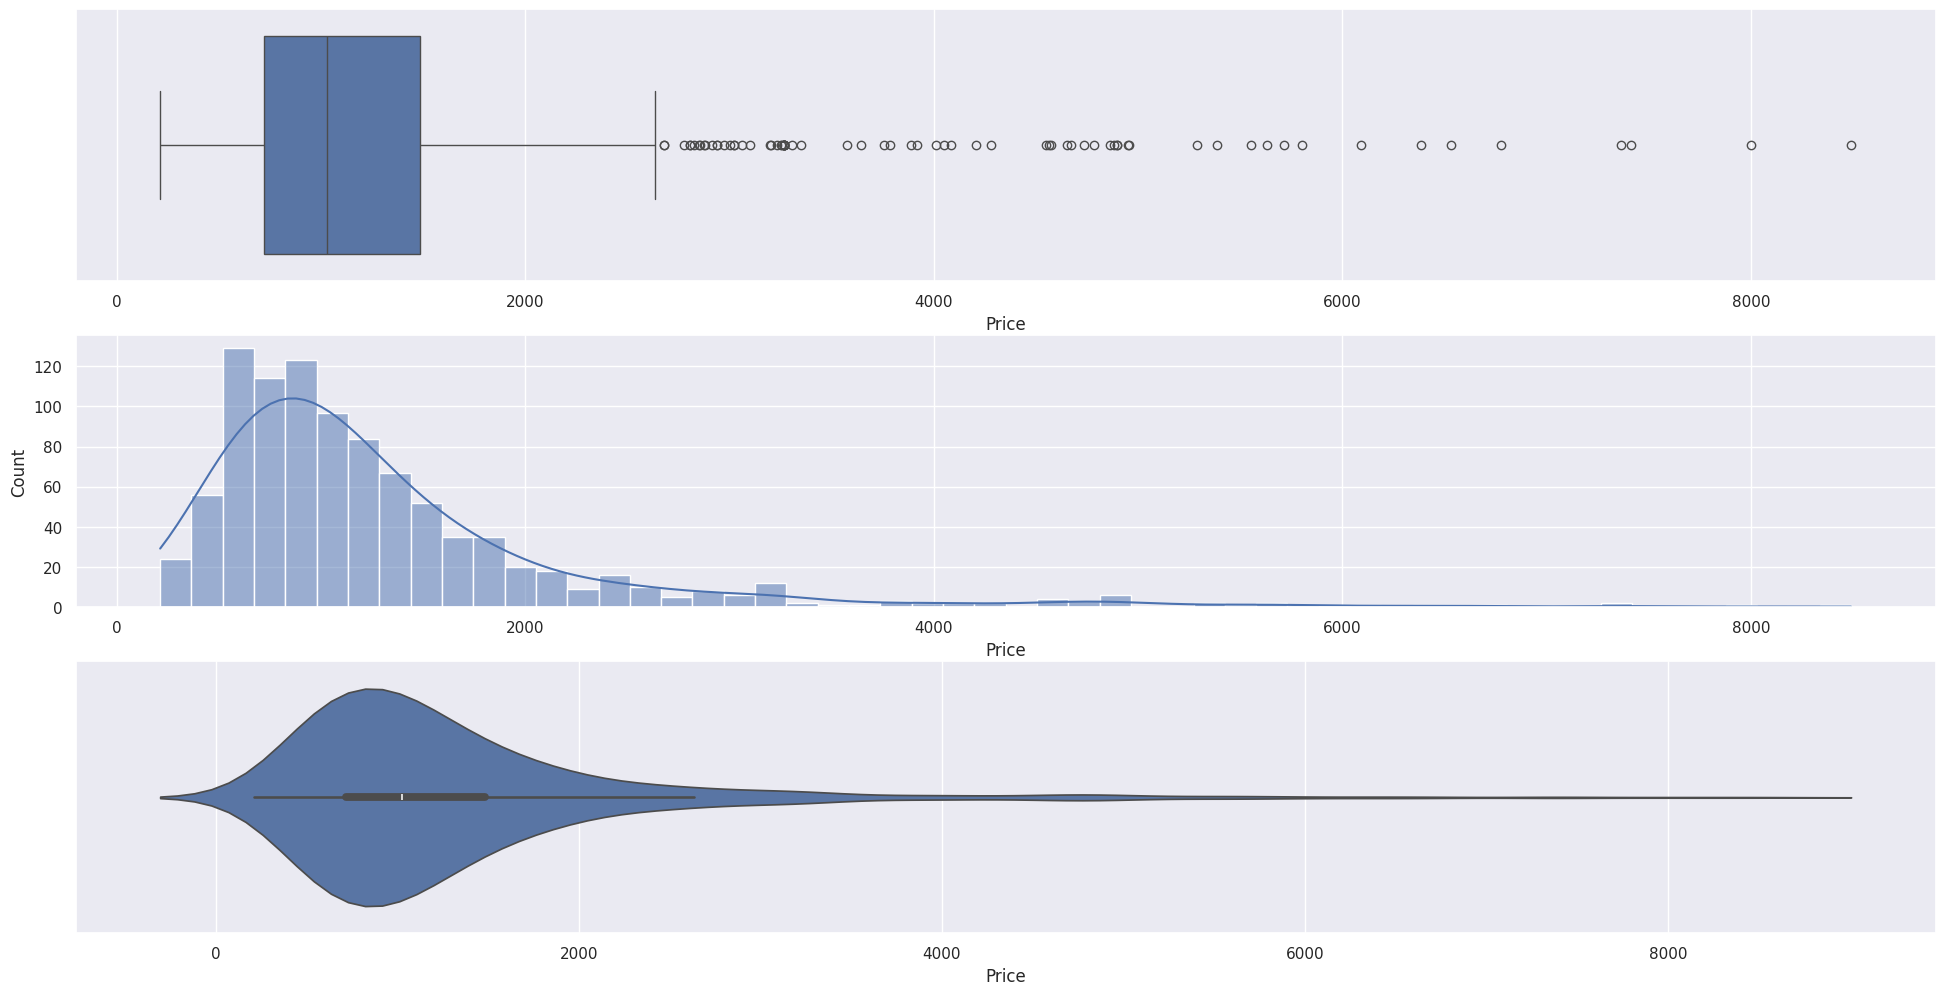

In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = laptopData_clean['Price'], orient = "h", ax = axes[0])
sb.histplot(data = laptopData_clean['Price'], kde=True, ax = axes[1])
sb.violinplot(data = laptopData_clean['Price'], orient = "h", ax = axes[2])

These graph gives us a better visualization on the distribution of data. Here, the data is positively skewed.

## **Numeric Predictors**

We then perform visualization on the numeric predictors.



In [ ]:
# Numeric Predictors
laptopData_numeric = laptopData_clean.select_dtypes(include=["int64", "float64"])
laptopData_numeric

Price  Rating  Core_per_processor  Low_Power_Cores  \
0      822.975180    4.30                 6.0              0.0   
1      435.826257    4.45                 4.0              0.0   
2      604.376225    4.65                 6.0              0.0   
3     1142.880470    4.75                12.0              0.0   
4      391.737427    4.25                 2.0              0.0   
...           ...     ...                 ...              ...   
1015  4049.624428    4.45                14.0              0.0   
1016  4784.291313    4.20                14.0              0.0   
1017   960.156760    4.40                 6.0              0.0   
1018   898.089484    4.25                 6.0              0.0   
1019  1542.945787    4.05                10.0              0.0   

      Energy_Efficient_Units  Threads  RAM_GB  Storage_capacity_GB  \
0                          0     12.0       8                  512   
1                          0      8.0       8                  512   
2                          0      8.0       8                  512   
3                          0     16.0      16                  512   
4                          0      4.0       8                  512   
...                      ...      ...     ...                  ...   
1015                       0     20.0      32                 1000   
1016                       0     20.0      32                 1000   
1017                       0     12.0       8                  512   
1018                       0     12.0       8                  512   
1019                       0     12.0       8                  512   

      Display_size_inches  Horizontal_pixel  Vertical_pixel     ppi  
0                    15.6              1920            1080  141.21  
1                    15.6              1920            1080  141.21  
2                    15.6              1920            1080  141.21  
3                    13.3              1080            1920  165.63  
4                    15.6              1920            1080  141.21  
...                   ...               ...             ...     ...  
1015                 17.0              2560            1600  177.58  
1016                 16.0              3840            2400  283.02  
1017                 15.6              1920            1080  141.21  
1018                 16.0              1920            1200  141.51  
1019                 16.0              1920            1200  141.51  

[960 rows x 12 columns]

In [ ]:
laptopData_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   960 non-null    float64
 1   Rating                  960 non-null    float64
 2   Core_per_processor      960 non-null    float64
 3   Low_Power_Cores         960 non-null    float64
 4   Energy_Efficient_Units  960 non-null    int64  
 5   Threads                 960 non-null    float64
 6   RAM_GB                  960 non-null    int64  
 7   Storage_capacity_GB     960 non-null    int64  
 8   Display_size_inches     960 non-null    float64
 9   Horizontal_pixel        960 non-null    int64  
 10  Vertical_pixel          960 non-null    int64  
 11  ppi                     960 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 97.5 KB


Using describe to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min), **first quartile** (denoted by 25%), **median** (denoted by 50%), **third quartile**(denoted by 75%) and **maximum value** (denoted by max) of each of the columns of the new dataframe.

In [ ]:
laptopData_numeric.describe()

Price      Rating  Core_per_processor  Low_Power_Cores  \
count   960.000000  960.000000          960.000000       960.000000   
mean   1309.988604    4.373698            8.541667         0.091667   
std    1020.610742    0.233894            4.381011         0.418465   
min     212.116264    3.950000            2.000000         0.000000   
25%     718.321359    4.187500            6.000000         0.000000   
50%    1026.959504    4.350000            8.000000         0.000000   
75%    1485.793599    4.550000           10.000000         0.000000   
max    8491.018942    4.750000           24.000000         2.000000   

       Energy_Efficient_Units     Threads      RAM_GB  Storage_capacity_GB  \
count              960.000000  960.000000  960.000000           960.000000   
mean                 0.045833   12.842708   14.029167           632.183333   
std                  0.209233    5.675924    6.866459           306.272773   
min                  0.000000    2.000000    4.000000            64.000000   
25%                  0.000000    8.000000    8.000000           512.000000   
50%                  0.000000   12.000000   16.000000           512.000000   
75%                  0.000000   16.000000   16.000000           512.000000   
max                  1.000000   32.000000   64.000000          4000.000000   

       Display_size_inches  Horizontal_pixel  Vertical_pixel         ppi  
count           960.000000        960.000000      960.000000  960.000000  
mean             15.202031       2022.632292     1204.437500  155.755656  
std               0.948551        386.349285      290.985382   31.799616  
min              11.600000       1080.000000      768.000000  100.450000  
25%              14.000000       1920.000000     1080.000000  141.210000  
50%              15.600000       1920.000000     1080.000000  141.210000  
75%              15.600000       1920.000000     1200.000000  161.730000  
max              18.000000       3840.000000     2560.000000  337.930000

These are the boxplot, histogram and violin plot for numerical predictors. Here we can see the distribution of our data for each of our predictors.

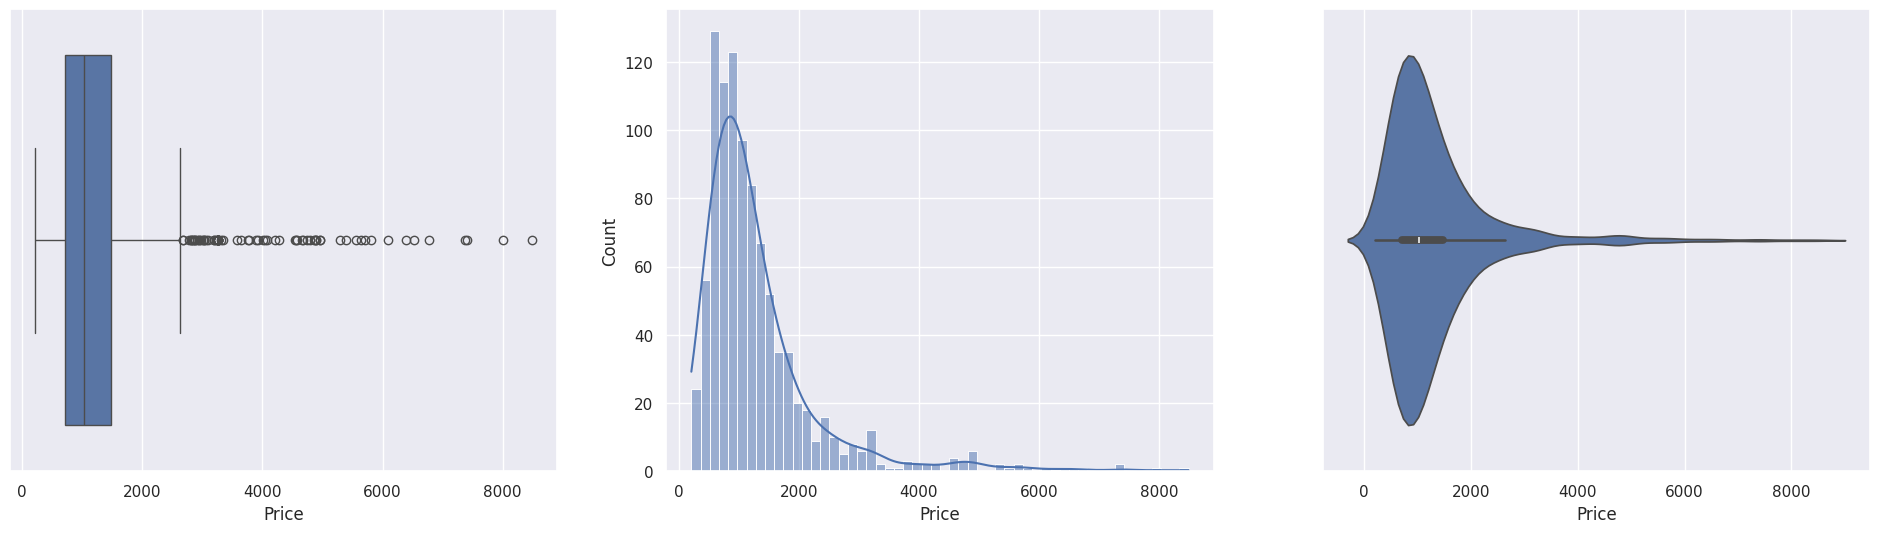

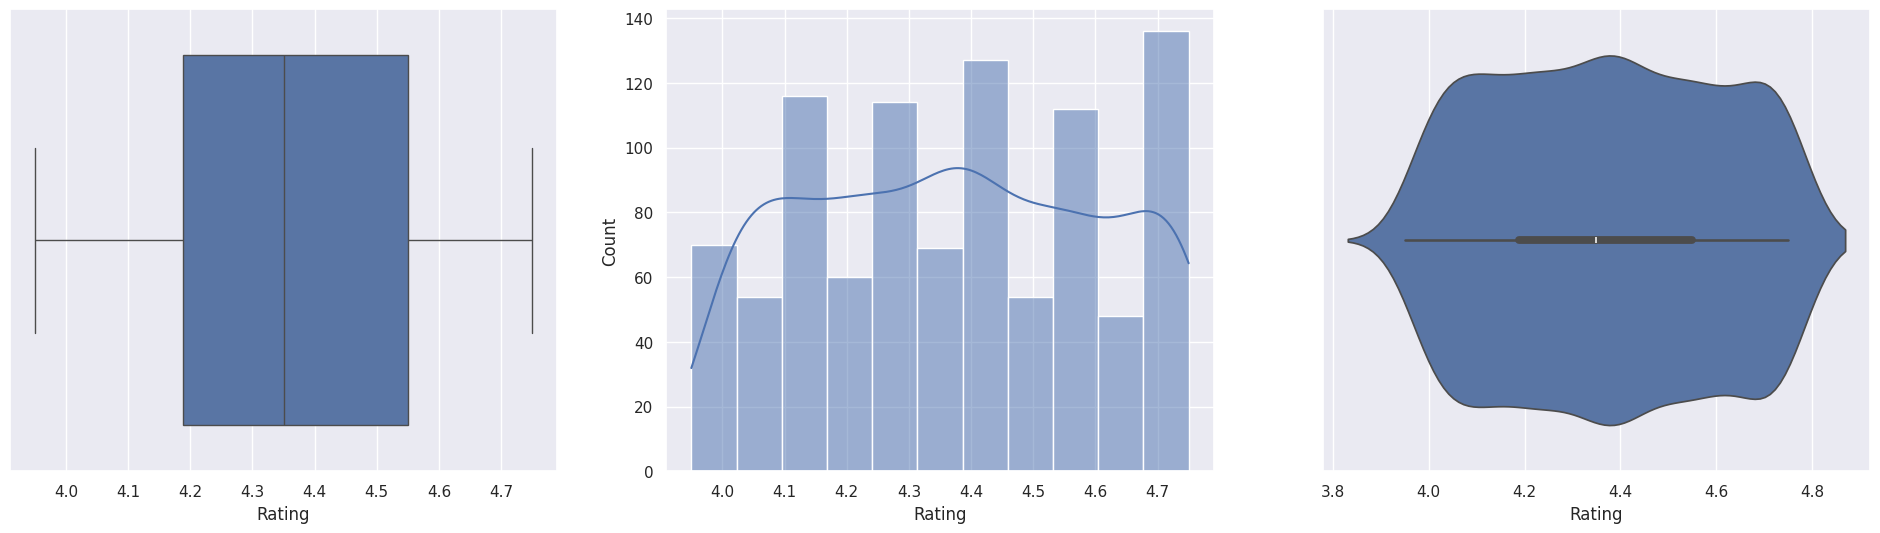

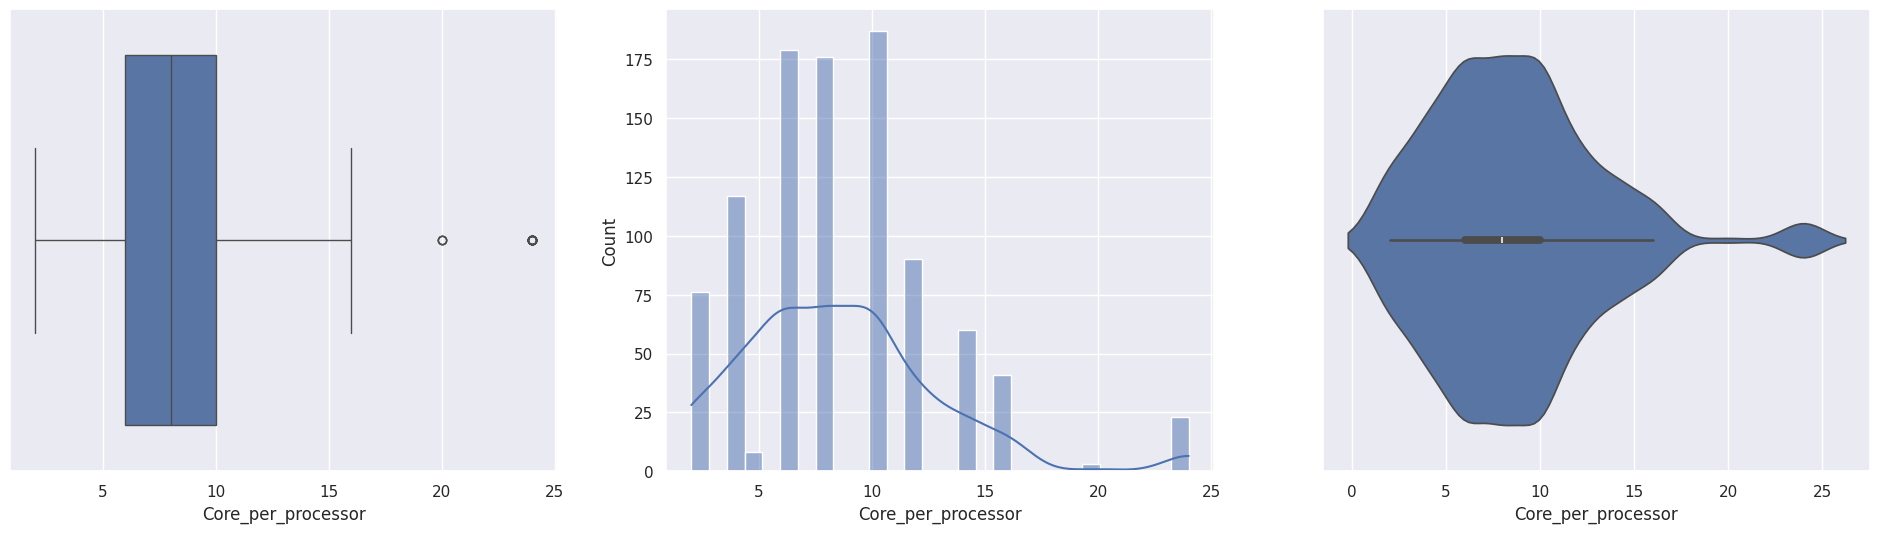

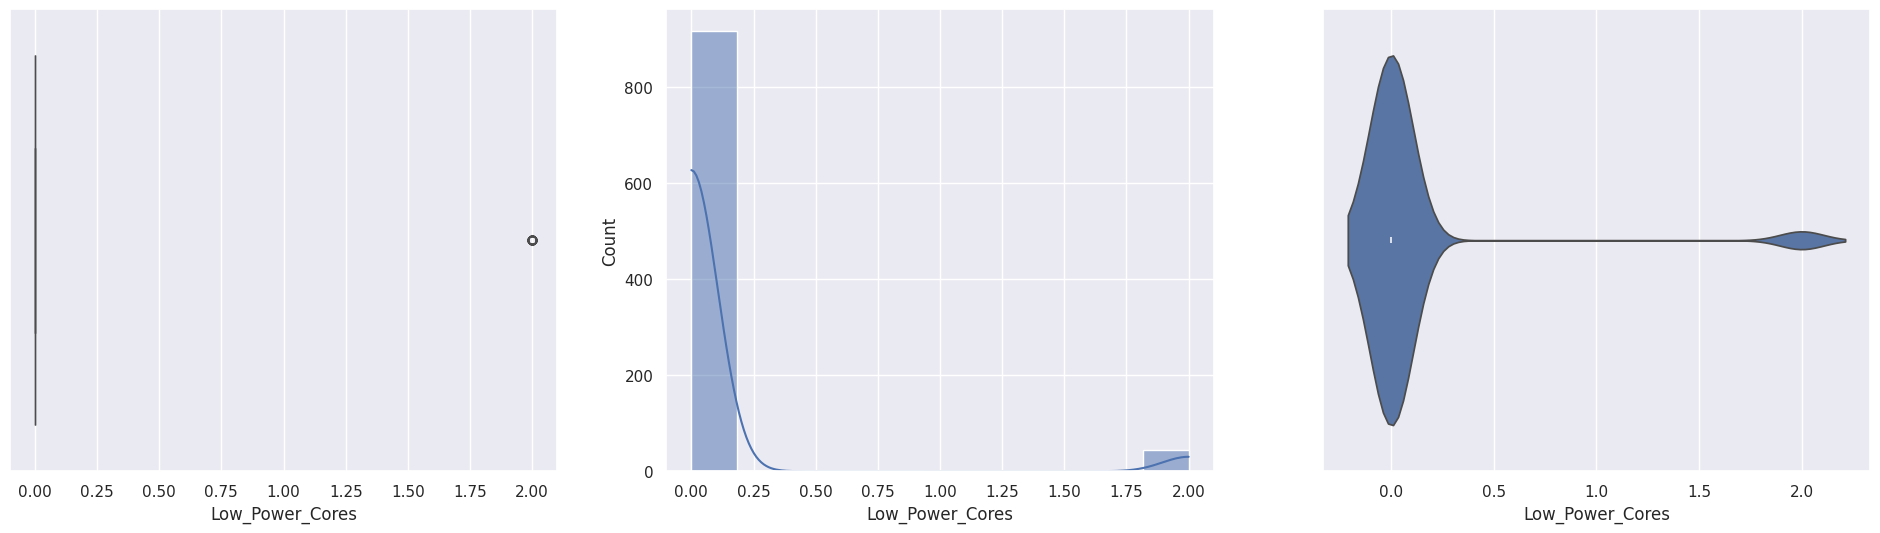

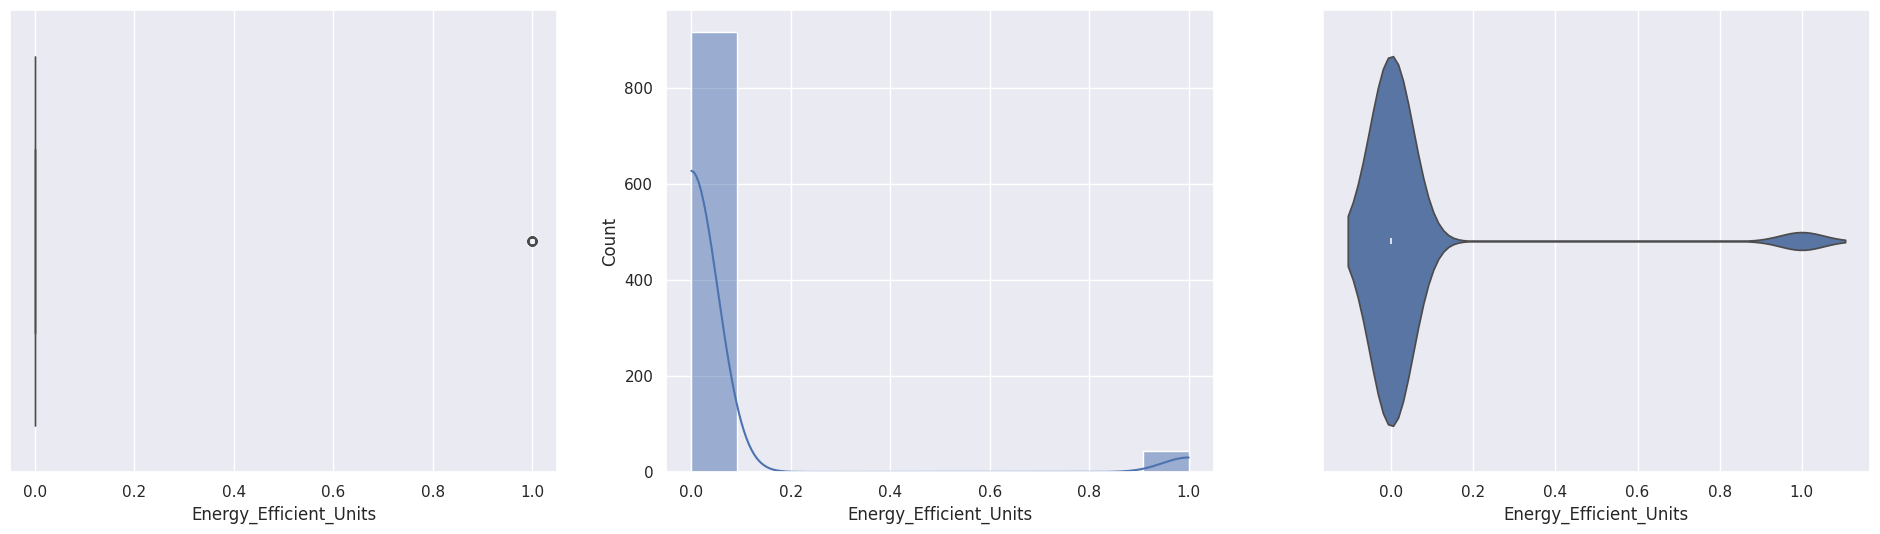

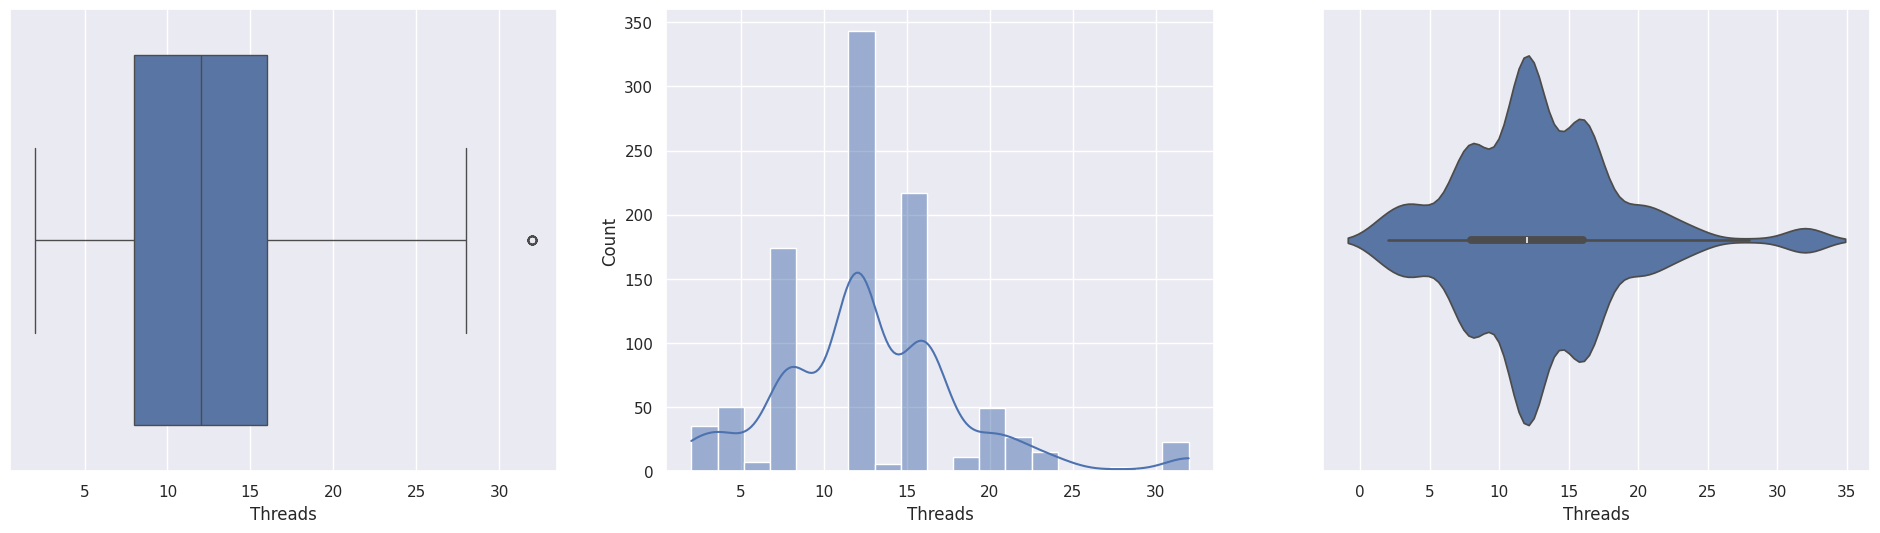

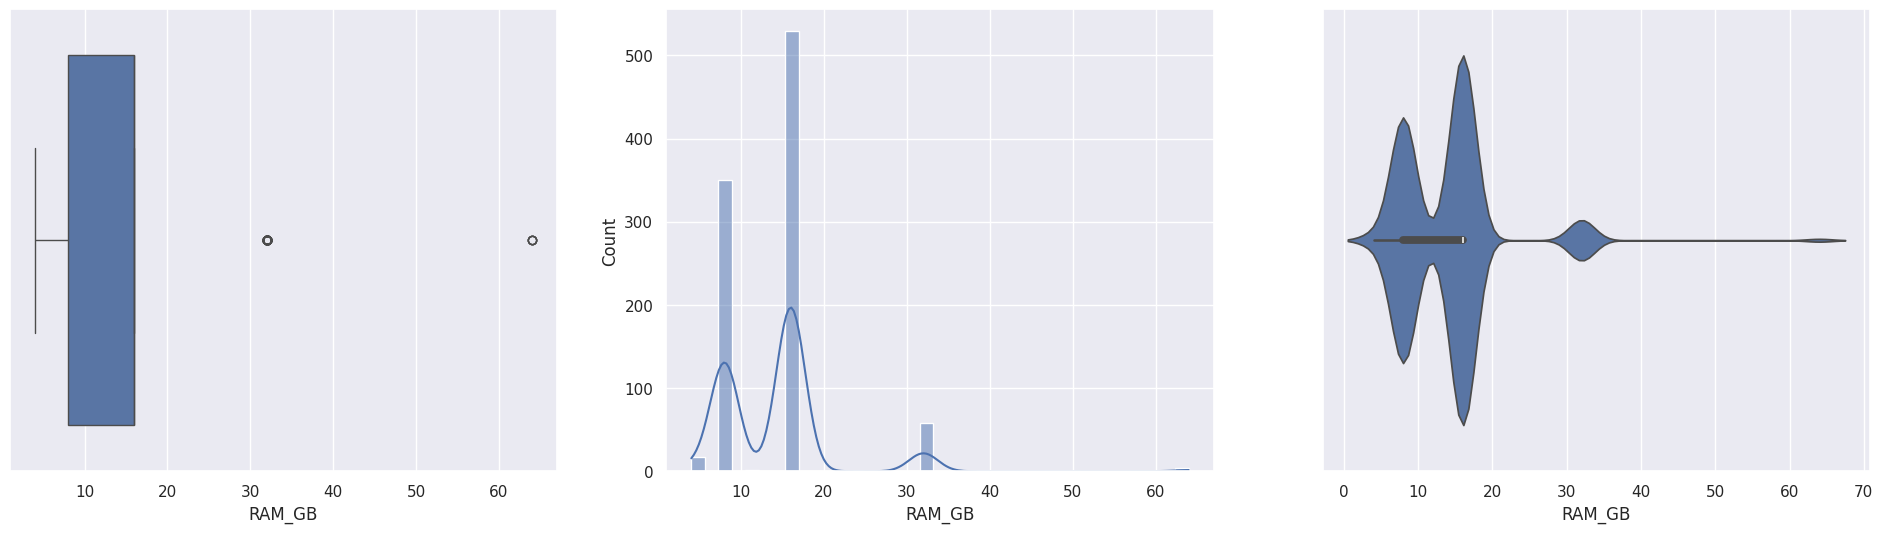

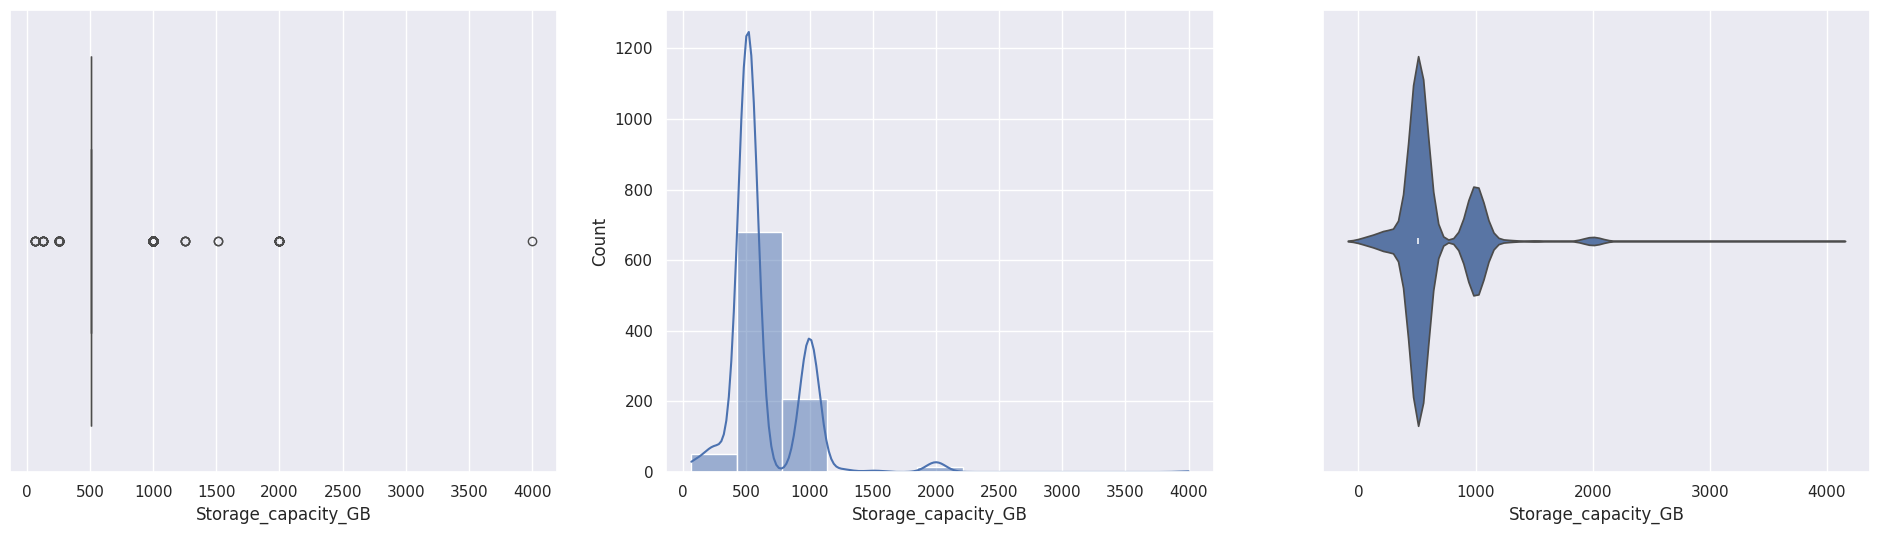

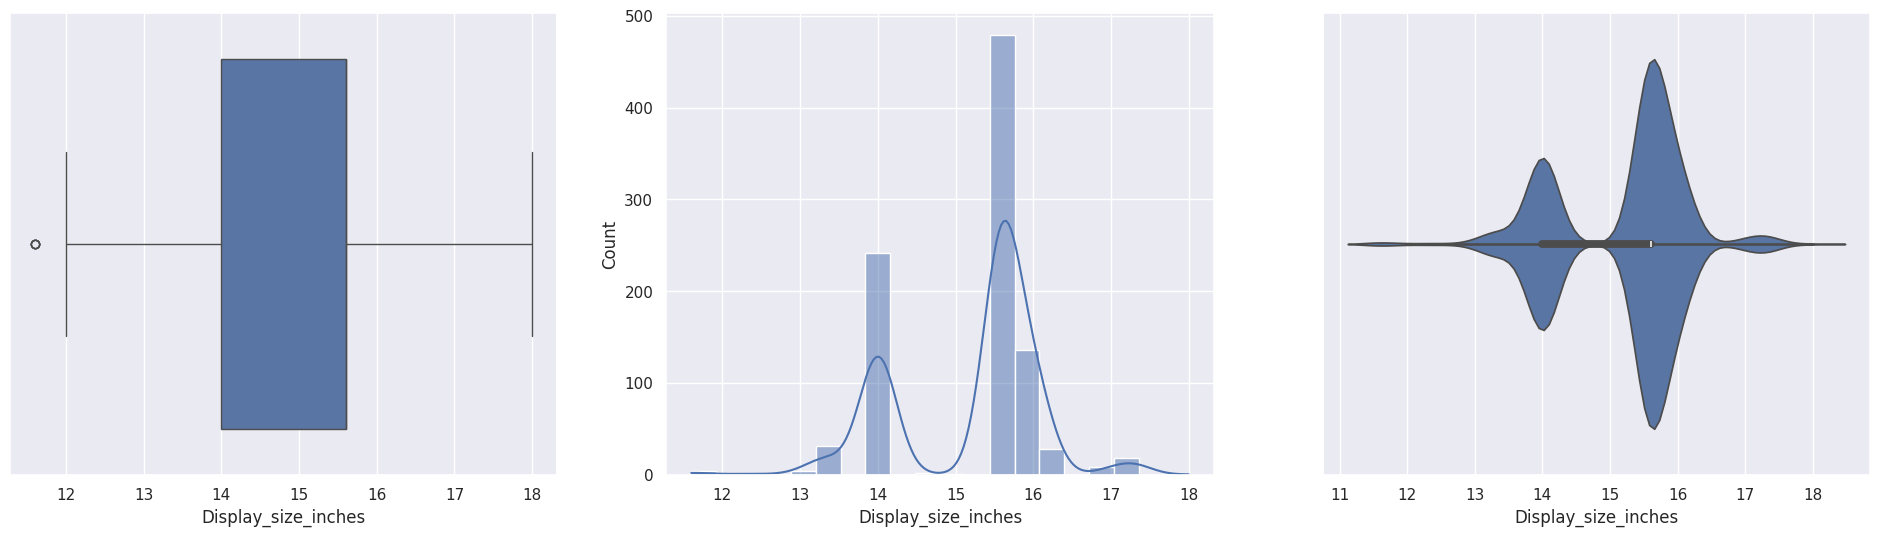

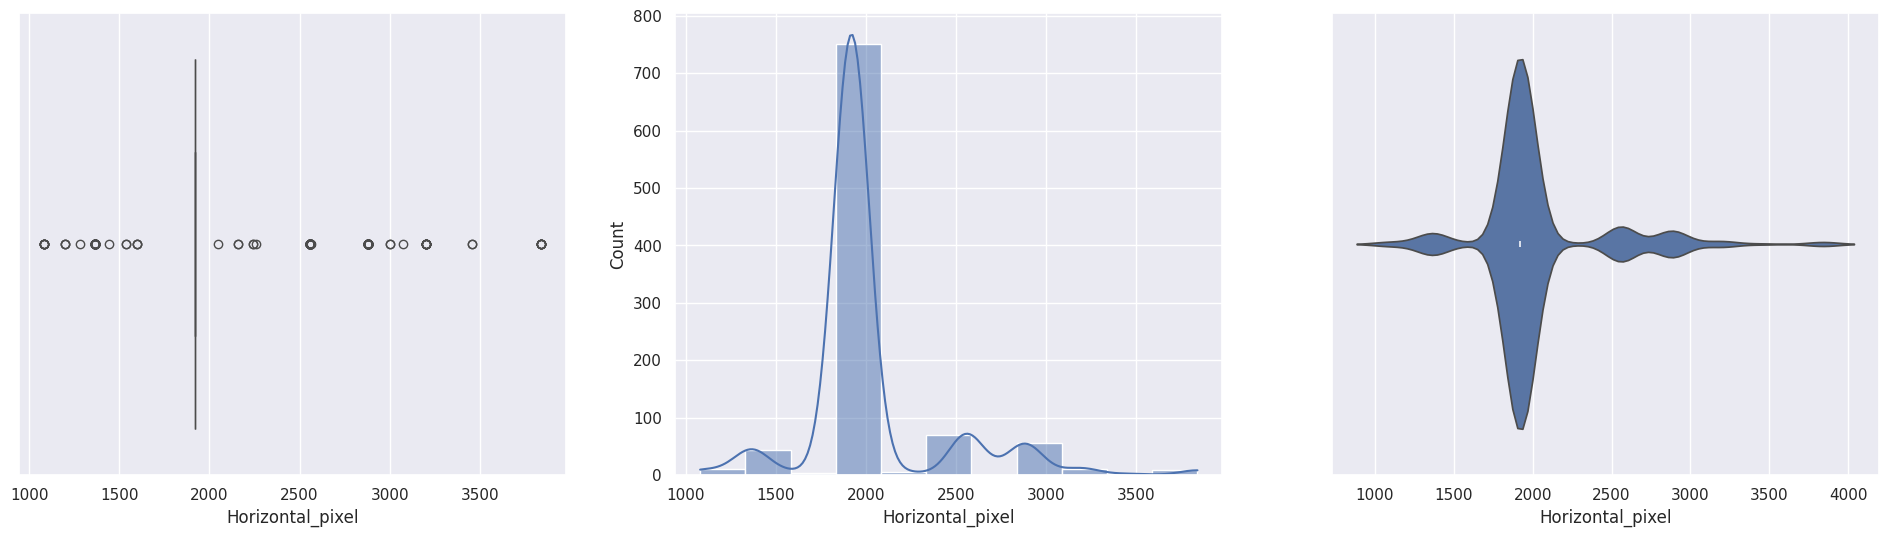

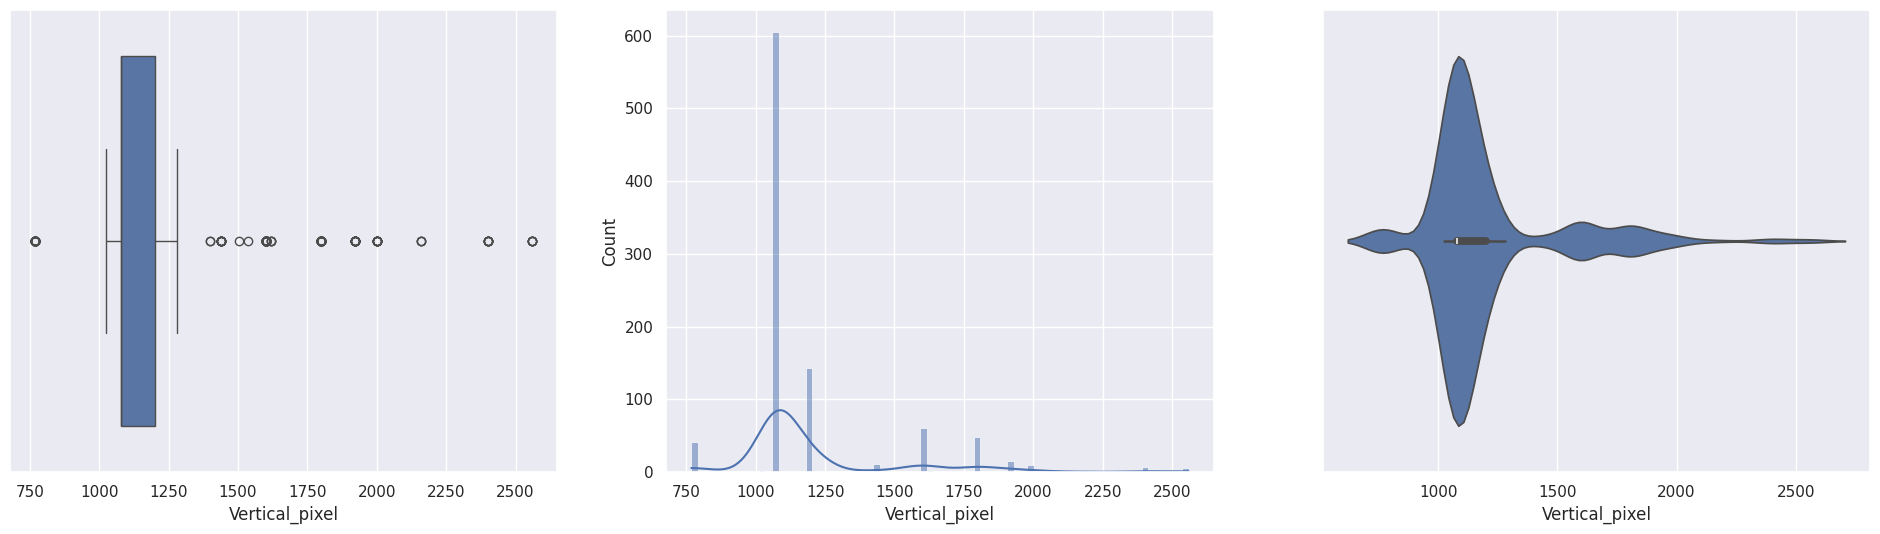

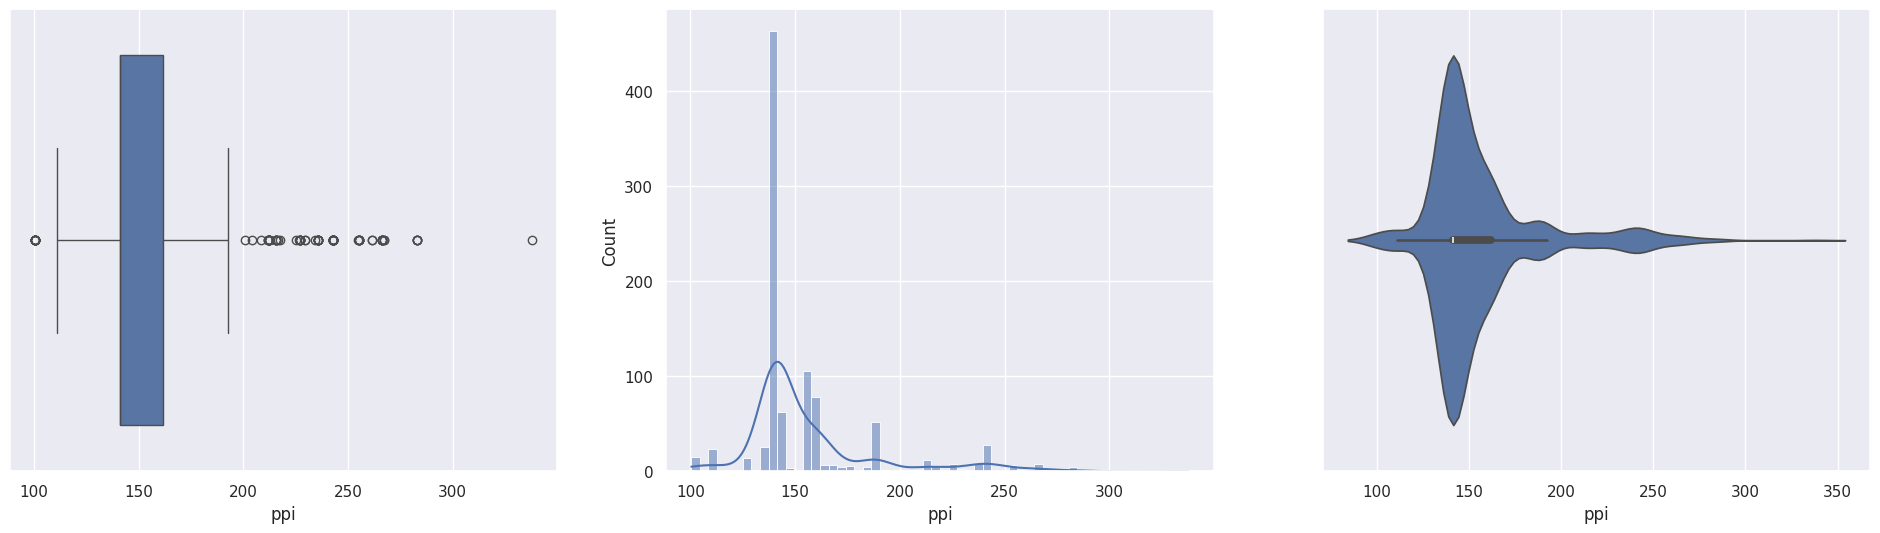

In [ ]:
for var in laptopData_numeric:
    f, axes=plt.subplots(1,3, figsize=(24,6))

    sb.boxplot(data = laptopData_numeric[var], orient = "h", ax = axes[0])
    sb.histplot(data = laptopData_numeric[var], kde=True, ax = axes[1])
    sb.violinplot(data = laptopData_numeric[var], orient = "h", ax = axes[2])

To choose the best predictors, we check the relationship of each variable with price.

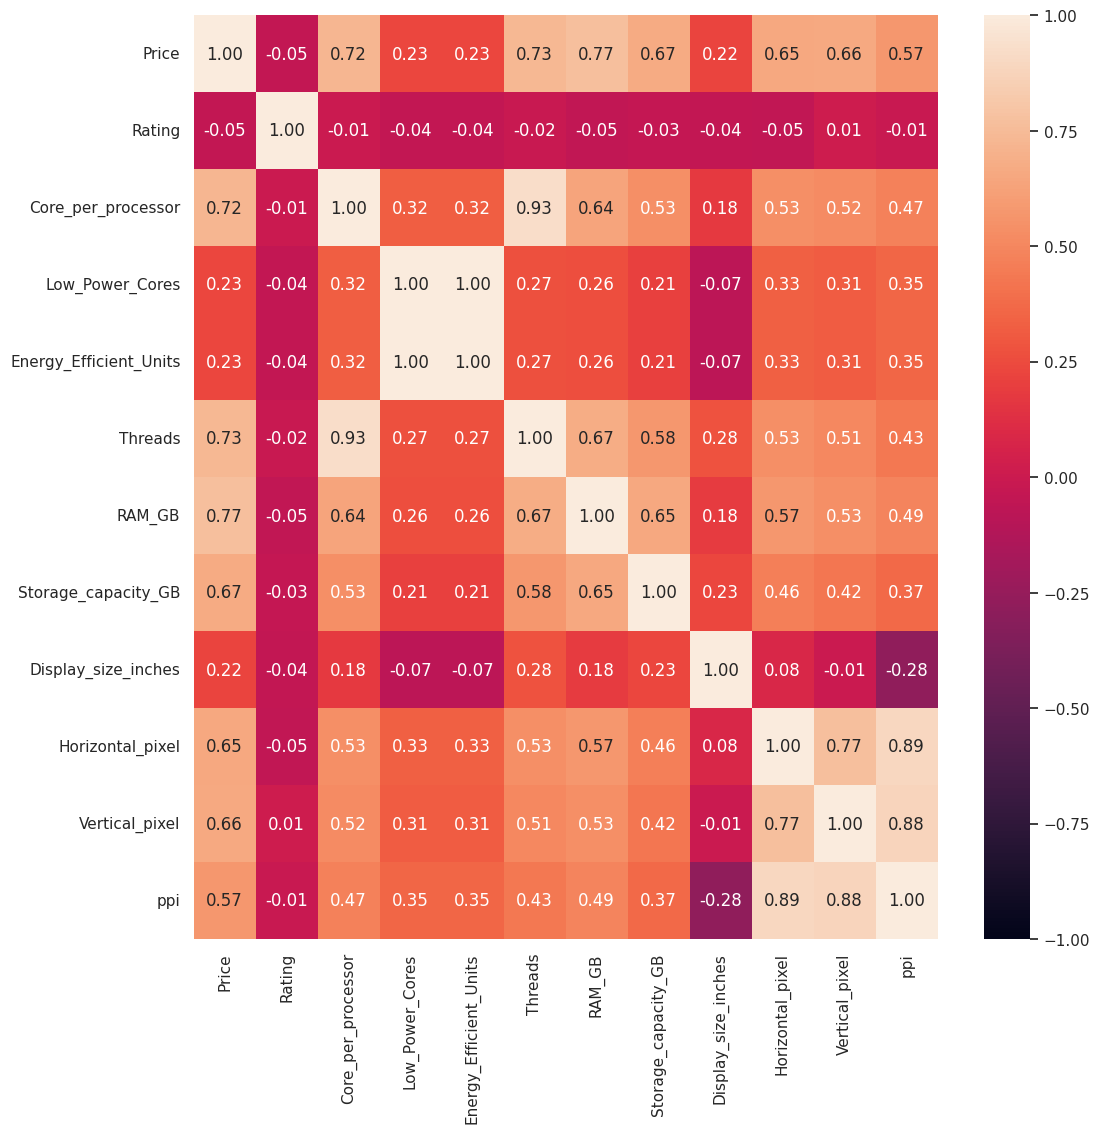

In [ ]:
# Calculate the correlation matrix
correlation_matrix = laptopData_numeric.corr()

# Create a heatmap of the correlation matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

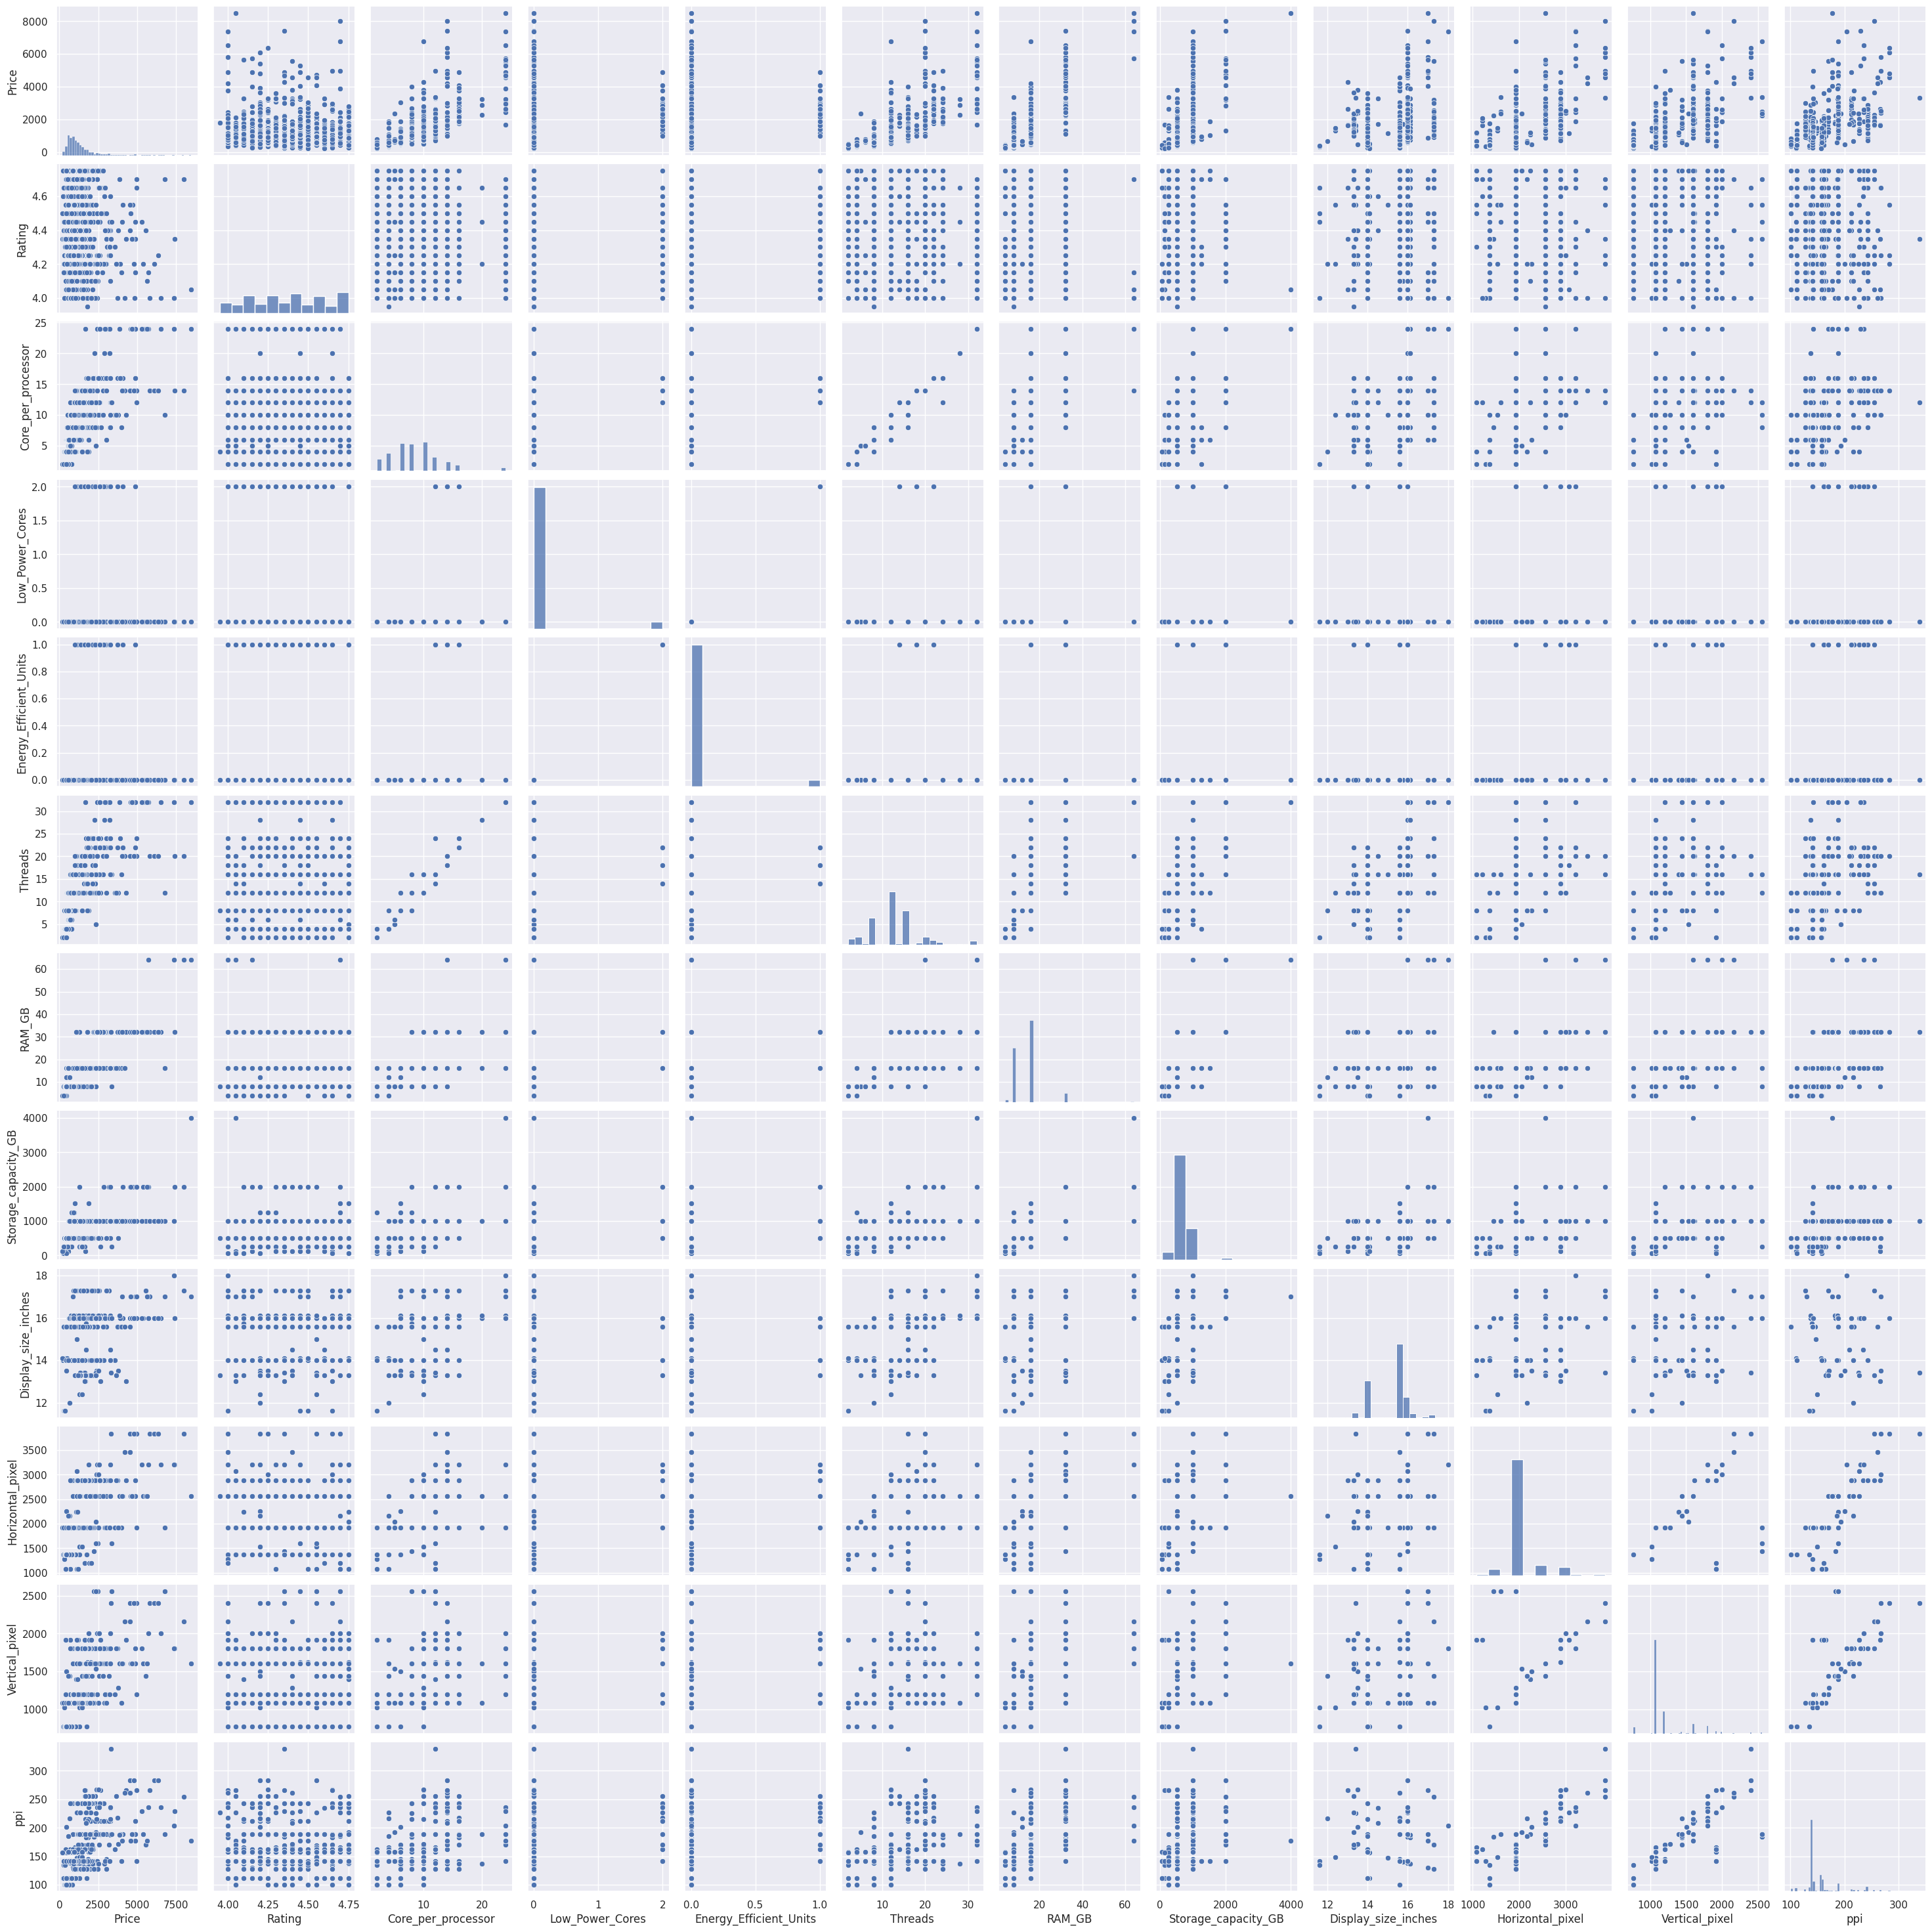

In [ ]:
sb.pairplot(data=laptopData_numeric)

From the correlation matrix, we can see that **`RAM_GB`** has the highest correlation, followed by **`Threads`**, **`Core per Processor`**,  **`Storage_capacity_GB`**, **`Horizontal_pixel`**, **`Vertical_pixel`**, and  **`ppi`**. The other variables have low correlations with Price, and thus will not be used for this exercise.    

Moreover, the formula of PPI (Pixels per inch) is given by\
$$
PPI = \sqrt{\left(\frac{horizontal\_pixels}{display\_size\_inches}\right)^2 + \left(\frac{vertical\_pixels}{display\_size\_inches}\right)^2}
$$

PPI, horizontal pixel and vertical pixel are related. However vertical pixel has the most correlation with price so we will be using vertical pixel.

Although Threads and Core per Processor have a higher correlation than Storage_capacity and vertical pixel. The average consumer will care more about  the storage size and screen resolution of their laptop.

Therefore we have decided tofocus on 3 numerical predictors which are **`RAM_GB`**, **`Storage_capacity_GB`** and **`Vertical_pixel`**.


Let's look into our chosen variables more closely.






### **Statistical Summary of Numeric Variables**

In [ ]:
RAM = pd.DataFrame(laptopData_numeric['RAM_GB'])
StoC = pd.DataFrame(laptopData_numeric['Storage_capacity_GB'])
vertical_pixel = pd.DataFrame(laptopData_numeric['Vertical_pixel'])

**Summary Statistics of `Price`, followed by Statistical Visualizations on the variables**

In [ ]:
laptopData_numeric = pd.DataFrame(laptopData_numeric[["Price", "RAM_GB", "Storage_capacity_GB" , "Vertical_pixel"]])
laptopData_numeric.describe()

Price      RAM_GB  Storage_capacity_GB  Vertical_pixel
count   960.000000  960.000000           960.000000      960.000000
mean   1309.988604   14.029167           632.183333     1204.437500
std    1020.610742    6.866459           306.272773      290.985382
min     212.116264    4.000000            64.000000      768.000000
25%     718.321359    8.000000           512.000000     1080.000000
50%    1026.959504   16.000000           512.000000     1080.000000
75%    1485.793599   16.000000           512.000000     1200.000000
max    8491.018942   64.000000          4000.000000     2560.000000

**Statistical Visualization**


1. RAM_GB\
We look at the overiew of the RAM_GB data by using `value_counts`. And once again, the boxplot, histogram plot with kernal density estimate (KDE) and violin plot for RAM_GB. Our data is positively skewed.

In [ ]:
RAM.value_counts()

RAM_GB
16        529
8         350
32         58
4          17
64          4
12          2
Name: count, dtype: int64

<Axes: >

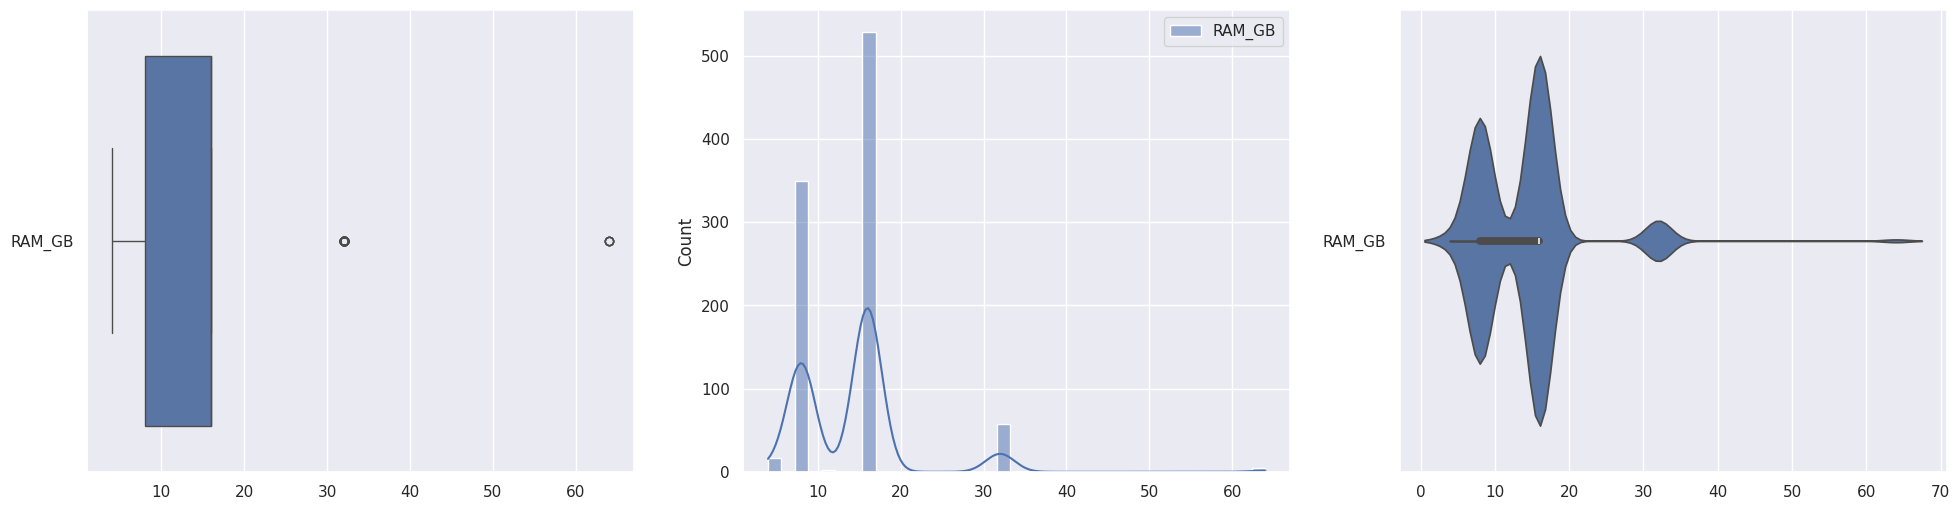

In [ ]:
f, axes=plt.subplots(1,3, figsize=(24,6))

sb.boxplot(data=RAM, orient='h', ax=axes[0])
sb.histplot(data=RAM, kde=True, ax=axes[1])
sb.violinplot(data=RAM, orient='h', ax=axes[2])

2. Storage_capacity_GB\
We look at the overiew of the Storage_capacity_GB data by using `value_counts`. The boxplot, histogram plot with kernal density estimate (KDE) and violin plot for Storage_capacity_GB. Our data is positively skewed.

In [ ]:
StoC.value_counts()

Storage_capacity_GB
512                    680
1000                   206
256                     35
2000                    15
128                     10
64                       7
1256                     4
1512                     2
4000                     1
Name: count, dtype: int64

<Axes: >

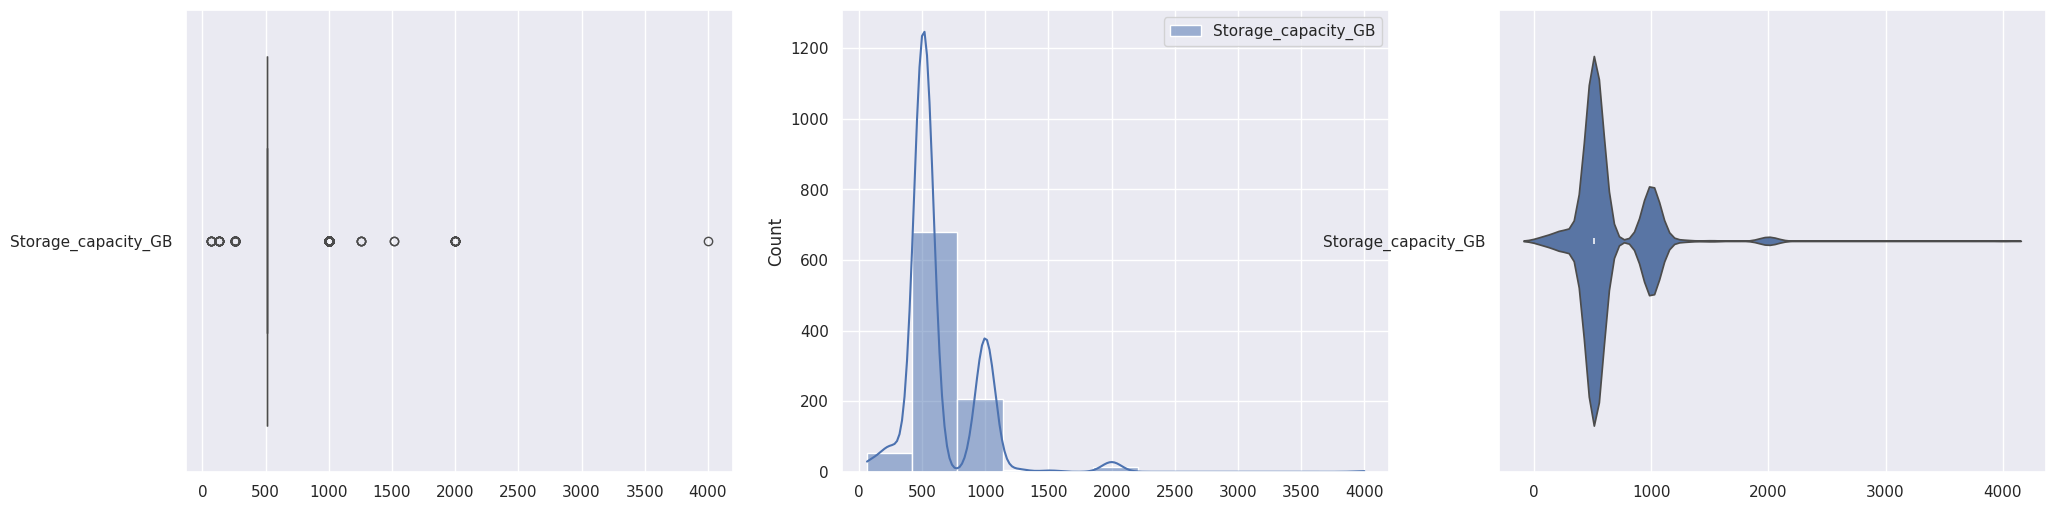

In [ ]:
f, axes=plt.subplots(1,3, figsize=(24,6))

sb.boxplot(data=StoC, orient='h', ax=axes[0])
sb.histplot(data=StoC, kde=True, ax=axes[1])
sb.violinplot(data=StoC, orient='h', ax=axes[2])

3. Vertical_pixel\
We look at the overiew of the Vertical_pixel data by using value_counts. The boxplot, histogram plot with kernal density estimate (KDE) and violin plot for Vertical_pixel. Our data is positively skewed.

In [ ]:
vertical_pixel.value_counts()

Vertical_pixel
1080              605
1200              143
1600               61
1800               48
768                41
1920               15
1440               11
2000               10
2400                7
2560                5
1620                3
1024                3
2160                3
1400                2
1504                1
1280                1
1536                1
Name: count, dtype: int64

<Axes: >

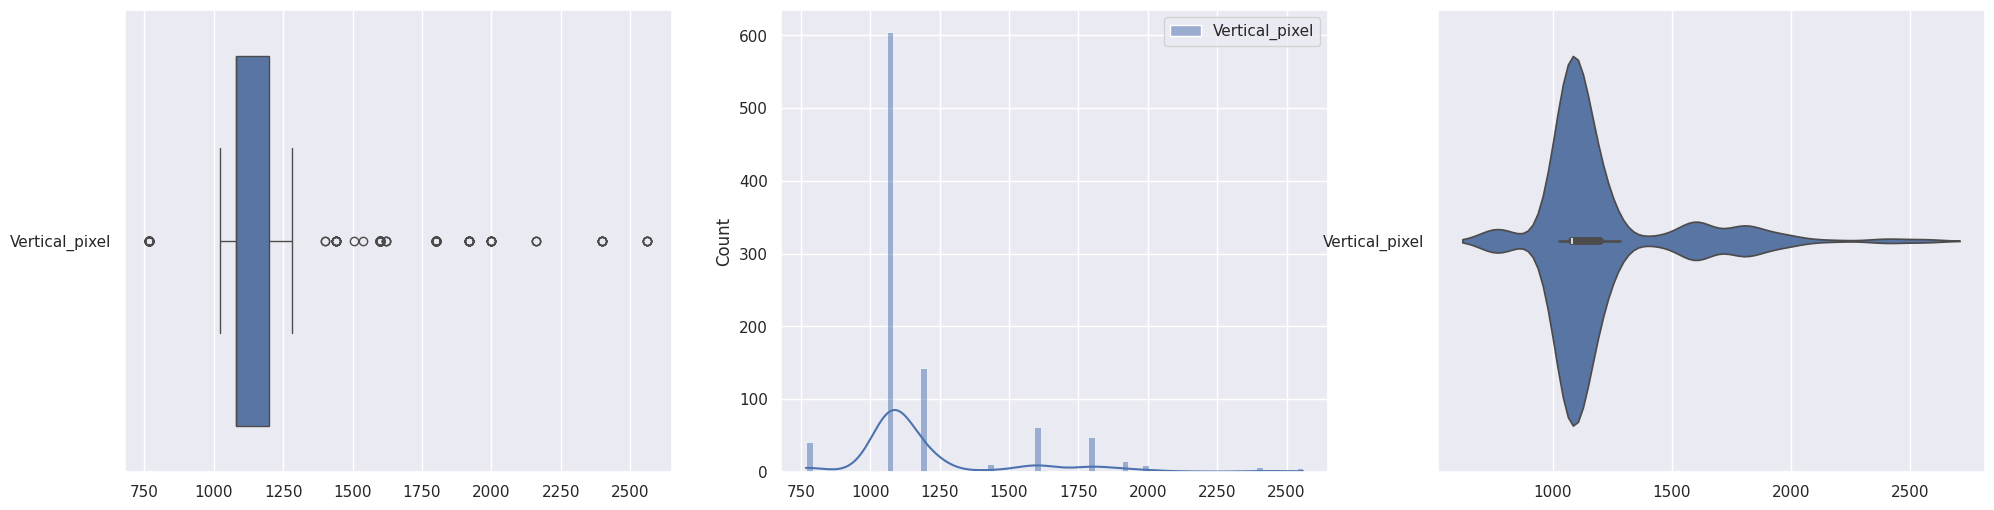

In [ ]:
f, axes=plt.subplots(1,3, figsize=(24,6))

sb.boxplot(data=vertical_pixel, orient='h', ax=axes[0])
sb.histplot(data=vertical_pixel, kde=True, ax=axes[1])
sb.violinplot(data=vertical_pixel, orient='h', ax=axes[2])

**Skewness**

Skewness is a measure of symmetry, which in turn tells us more about the distribution of the data.

*   If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
*   If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed.
*   If the skewness is less than -1 or greater than 1, the data is highly skewed.

From the skewness of each variable given below, we can conclude that our variables are highly skewed.

In [ ]:
for i in laptopData_numeric:
    print("Skewness of ", i, "\t: ", laptopData_numeric[i].skew())

Skewness of  Price 	:  2.934335036903041
Skewness of  RAM_GB 	:  2.4075665523167578
Skewness of  Storage_capacity_GB 	:  3.0391823433398386
Skewness of  Vertical_pixel 	:  2.0071510231492997


**Counting the number of outliers in each variable**
- Inter-Quartile Range $IQR$ = $Q3 - Q1$
- Lower whisker = $Q1 - 1.5 \times IQR$ = $Q1 - 1.5 \times (Q3 - Q1)$
- Upper whisker = $Q3 + 1.5 \times IQR$ = $Q3 + 1.5 \times (Q3 - Q1)$



In [ ]:
q1 = laptopData_numeric.quantile(0.25)
q3 = laptopData_numeric.quantile(0.75)
iqr = q3-q1
outliers = ((laptopData_numeric < q1-1.5*iqr) | (laptopData_numeric > q3+1.5*iqr)).sum()
outliers

Price                   71
RAM_GB                  62
Storage_capacity_GB    280
Vertical_pixel         208
dtype: int64

From the calculation, we can see that each variable has outliers.

**Discussion**

* `RAM_GB`: Highest correlationship value of 0.77, indicating strong positive relationship between RAM_GB and Price. The histogram is left-skewed, indicating most laptop has lower RAM_GB of 8 or 16 for now.               
* `Storage_capacity_GB`: Moderate correlationship value of 0.67, indicating moderate positive relationship between Storage_capacity_GB and Price. The histogram is left-skewed, indicating most laptop has a lower Storage_capacity_GB of 512 to 1000 for now.
* `Vertical_pixel`: Moderate correlationship value of 0.66, but the highest amomg data related to pixel, indicating moderate positive relationship between Vertical_pixel and Price. The histogram is left-skewed, indicating most laptop has a lower Vertical_pixel of 1080 to 1200 for now.





## **Categorical Predictors**

We then perform visualization on the categorical predictors.

In [ ]:
# Categorical Predictors
laptopData_categorical = laptopData_clean.select_dtypes(include=["object", "bool"])
laptopData_categorical

Brand Processor_brand Processor_variant RAM_type Storage_type  \
0          HP             AMD             5600H     DDR4          SSD   
1      Lenovo             AMD             7320U   LPDDR5          SSD   
2          HP           Intel             1215U     DDR4          SSD   
3     Samsung           Intel             1240P   LPDDR5          SSD   
4       Tecno           Intel            1115G4   LPDDR4          SSD   
...       ...             ...               ...      ...          ...   
1015      MSI           Intel            13900H     DDR5          SSD   
1016      MSI           Intel            13900H     DDR5          SSD   
1017       HP             AMD             5600H     DDR4          SSD   
1018     Asus             AMD             7530U     DDR4          SSD   
1019     Dell           Intel             1335U   LPDDR5          SSD   

                Graphics_name Graphics_brand Graphics_integreted  \
0         AMD Radeon RX 6500M            AMD               False   
1         AMD Radeon Graphics            AMD               False   
2          Intel UHD Graphics          Intel               False   
3      Intel Iris Xe Graphics          Intel               False   
4          Intel UHD Graphics          Intel               False   
...                       ...            ...                 ...   
1015  NVIDIA GeForce RTX 4070         NVIDIA               False   
1016  NVIDIA GeForce RTX 4070         NVIDIA               False   
1017      AMD Radeon RX 5600M            AMD               False   
1018           AMD Radeon AMD            AMD               False   
1019   Intel Iris Xe Graphics          Intel               False   

      Touch_screen Operating_system  
0             True    Windows 11 OS  
1            False    Windows 11 OS  
2            False    Windows 11 OS  
3            False    Windows 11 OS  
4            False    Windows 11 OS  
...            ...              ...  
1015         False    Windows 11 OS  
1016         False    Windows 11 OS  
1017         False    Windows 11 OS  
1018         False    Windows 11 OS  
1019          True    Windows 11 OS  

[960 rows x 10 columns]

In [ ]:
laptopData_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                960 non-null    object
 1   Processor_brand      960 non-null    object
 2   Processor_variant    960 non-null    object
 3   RAM_type             960 non-null    object
 4   Storage_type         960 non-null    object
 5   Graphics_name        960 non-null    object
 6   Graphics_brand       960 non-null    object
 7   Graphics_integreted  960 non-null    object
 8   Touch_screen         960 non-null    bool  
 9   Operating_system     960 non-null    object
dtypes: bool(1), object(9)
memory usage: 75.9+ KB


Now, we use `describe` to have an overview of the count, unique, top and freq of our categorical predictors.

In [ ]:
laptopData_categorical.describe()

Brand Processor_brand Processor_variant RAM_type Storage_type  \
count    960             960               960      960          960   
unique    27               2               114       11            3   
top       HP           Intel             1235U     DDR4          SSD   
freq     212             710                59      508          948   

                 Graphics_name Graphics_brand Graphics_integreted  \
count                      960            960                 960   
unique                     118              3                   2   
top     Intel Iris Xe Graphics          Intel               False   
freq                        98            467                 720   

       Touch_screen Operating_system  
count           960              960  
unique            2                7  
top           False    Windows 11 OS  
freq            848              916

We find and visualize the value counts and distribution for categorical variables.

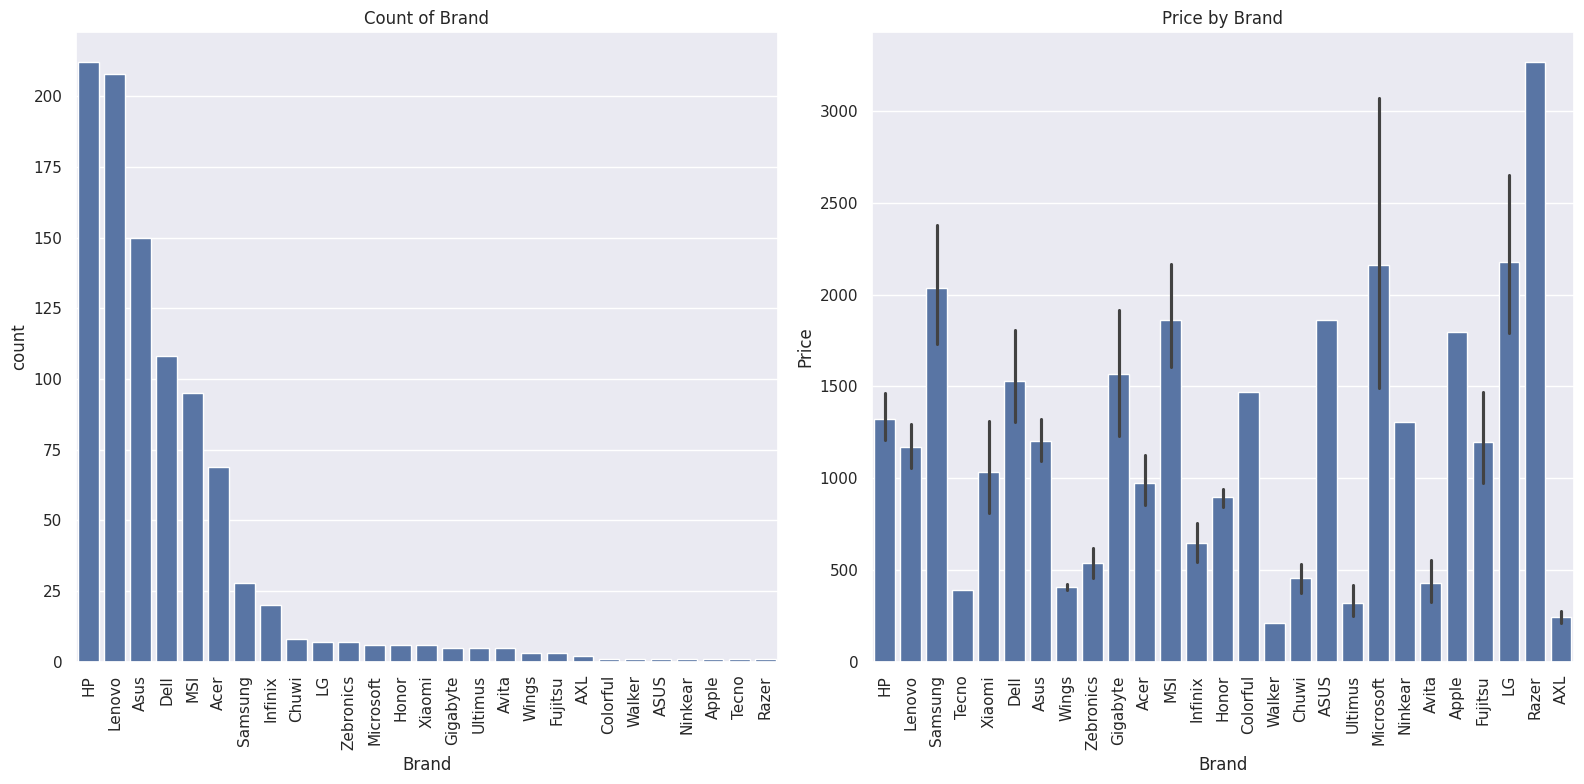

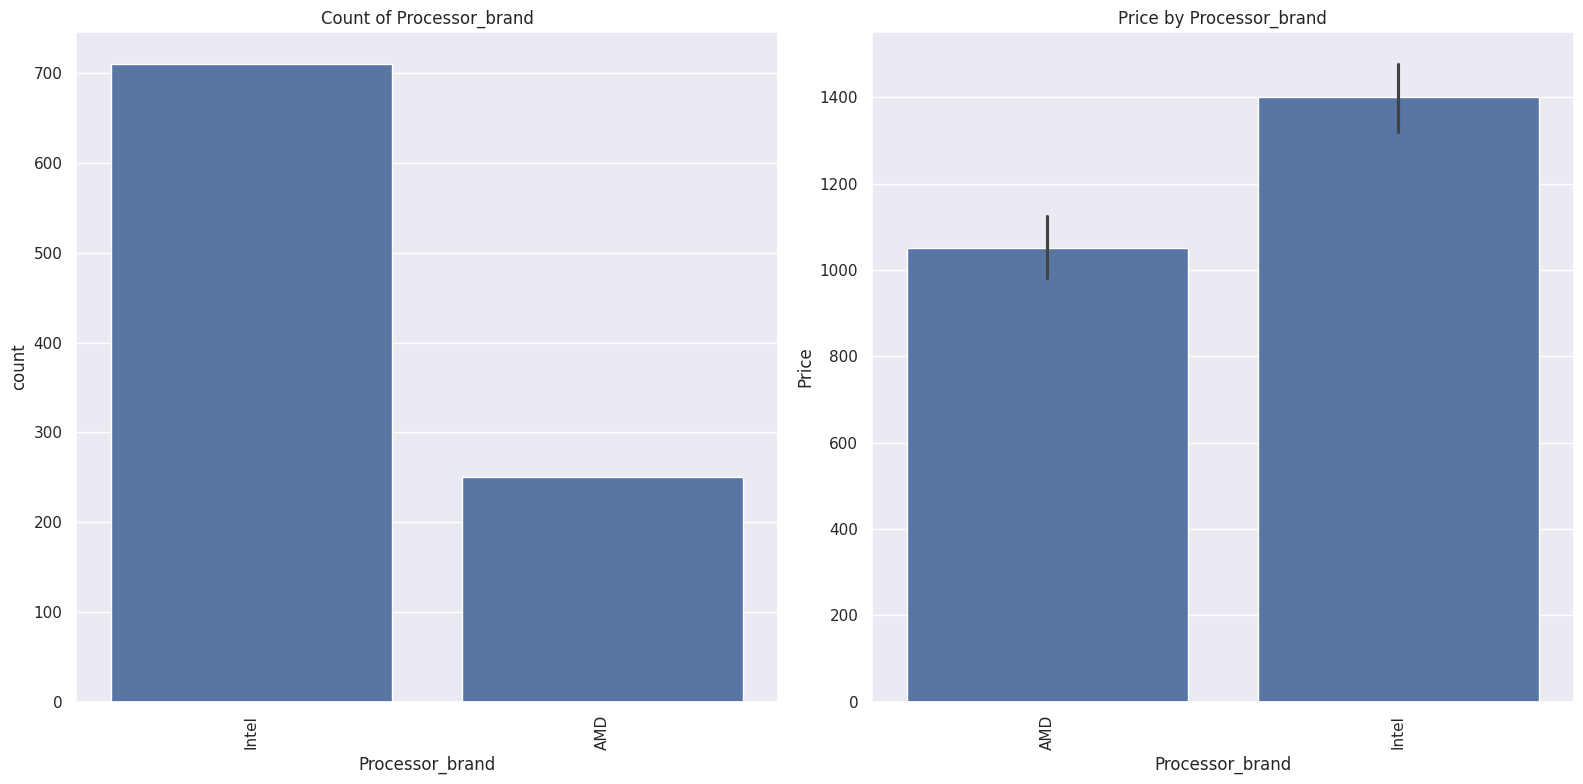

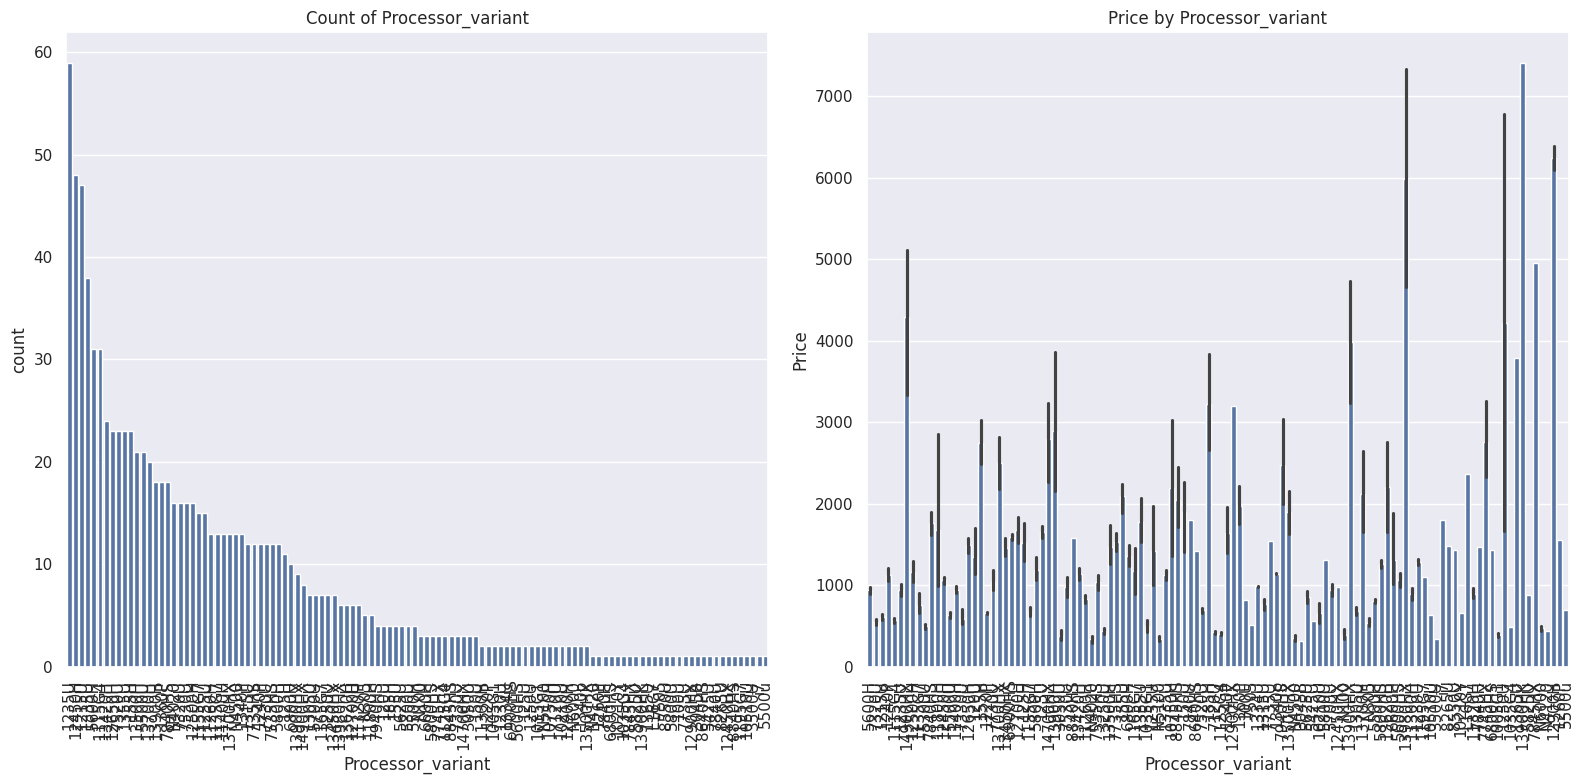

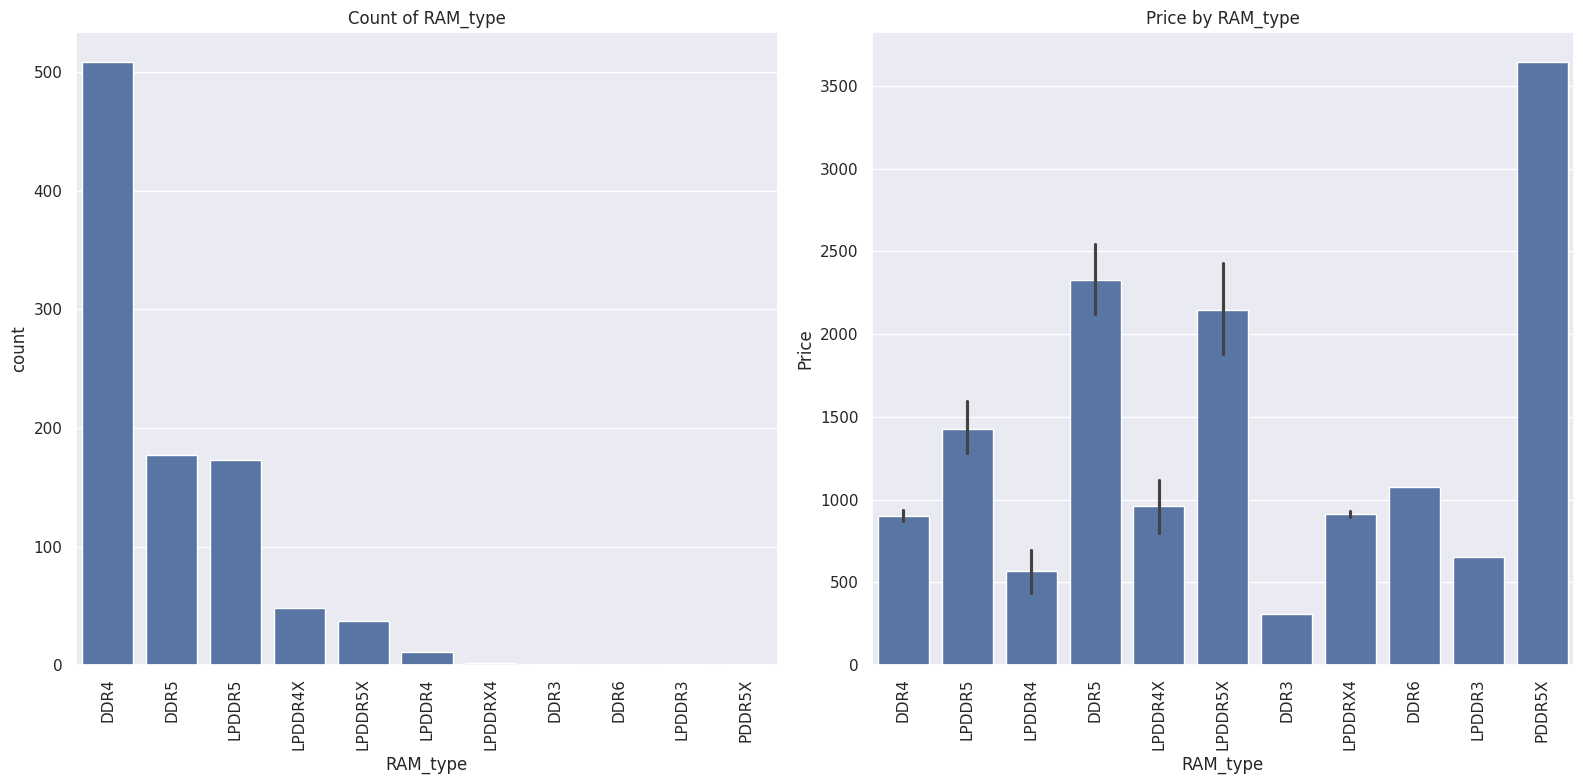

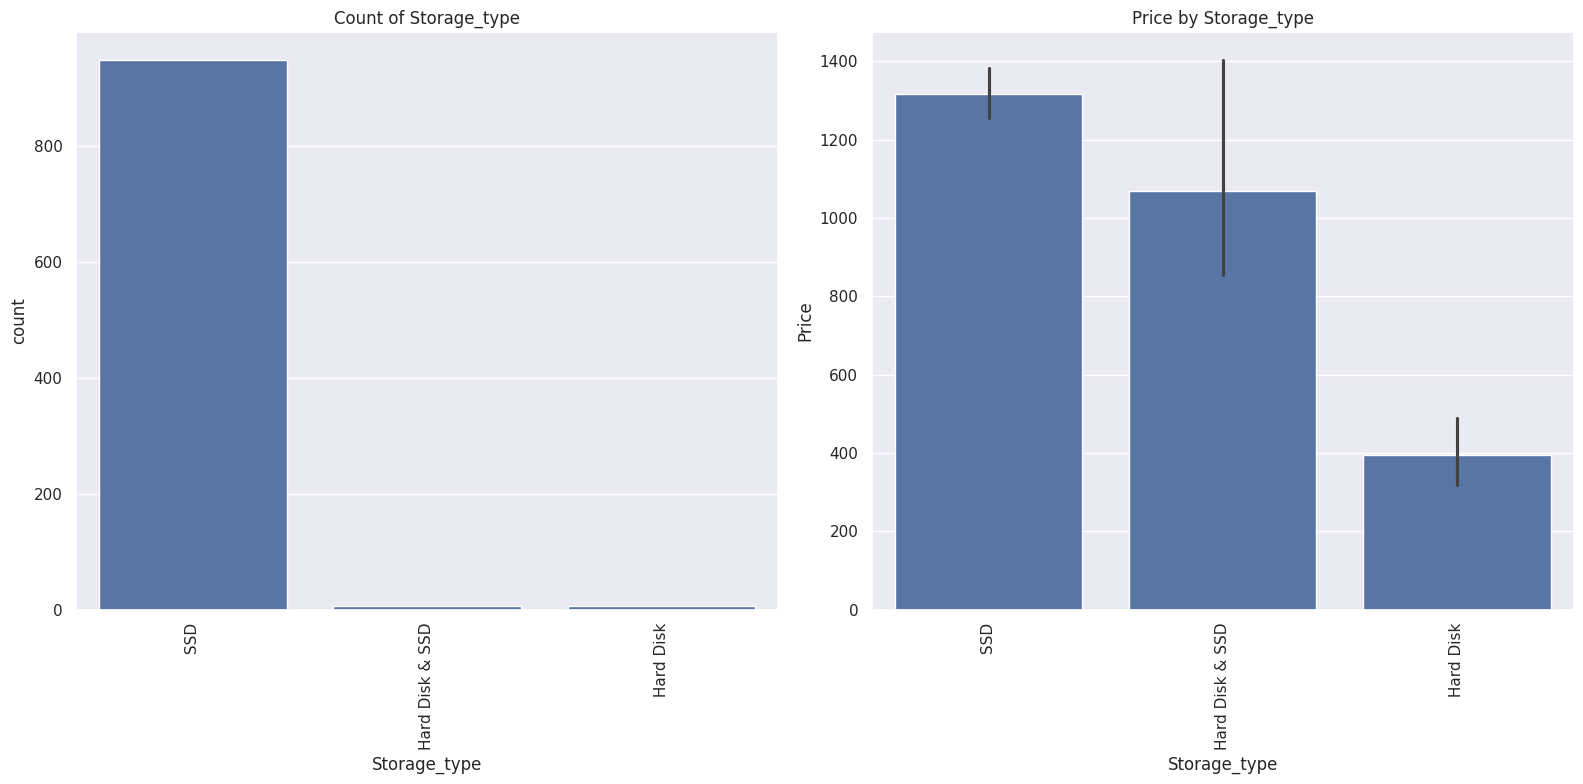

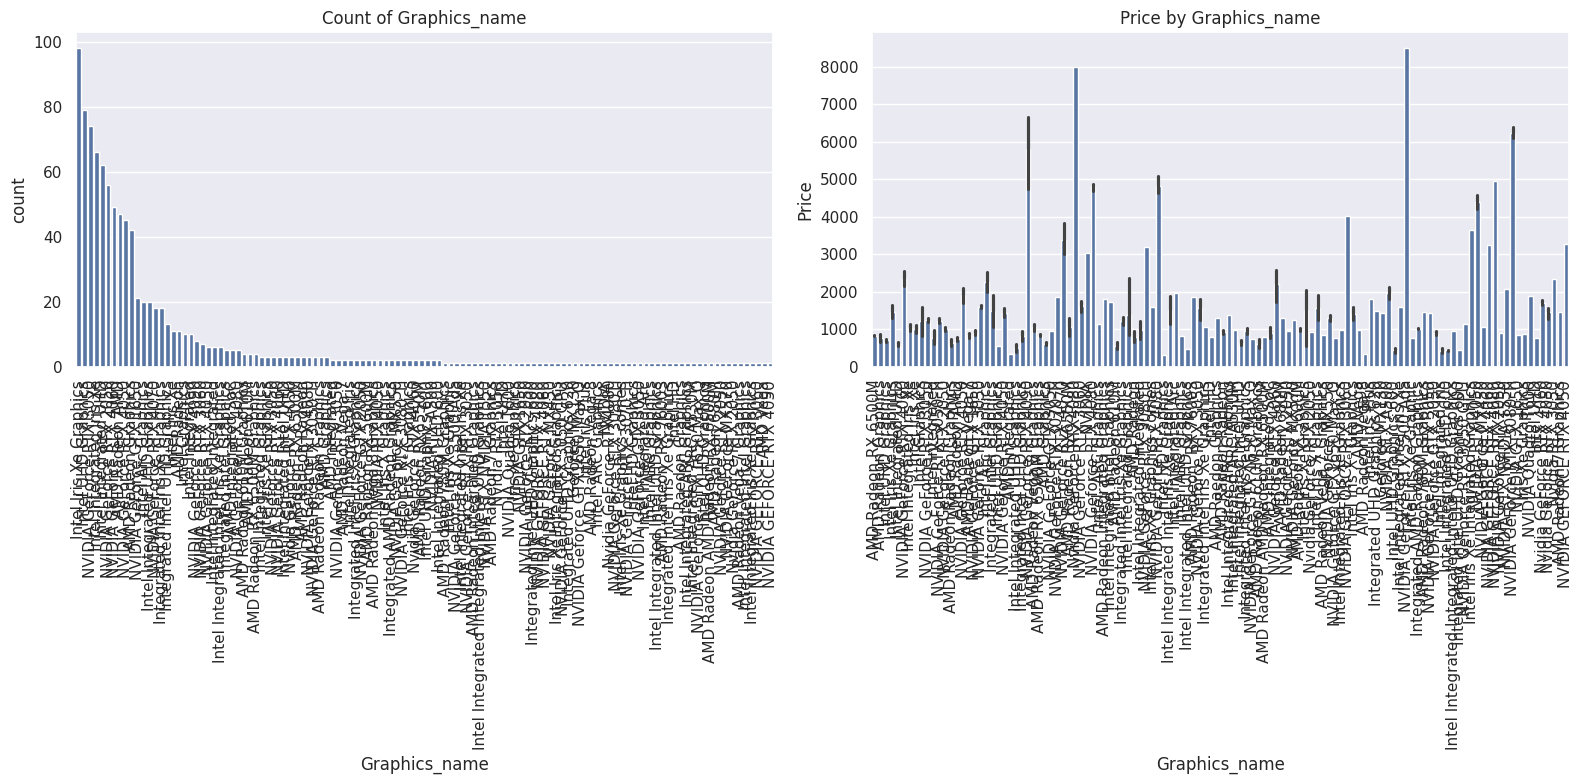

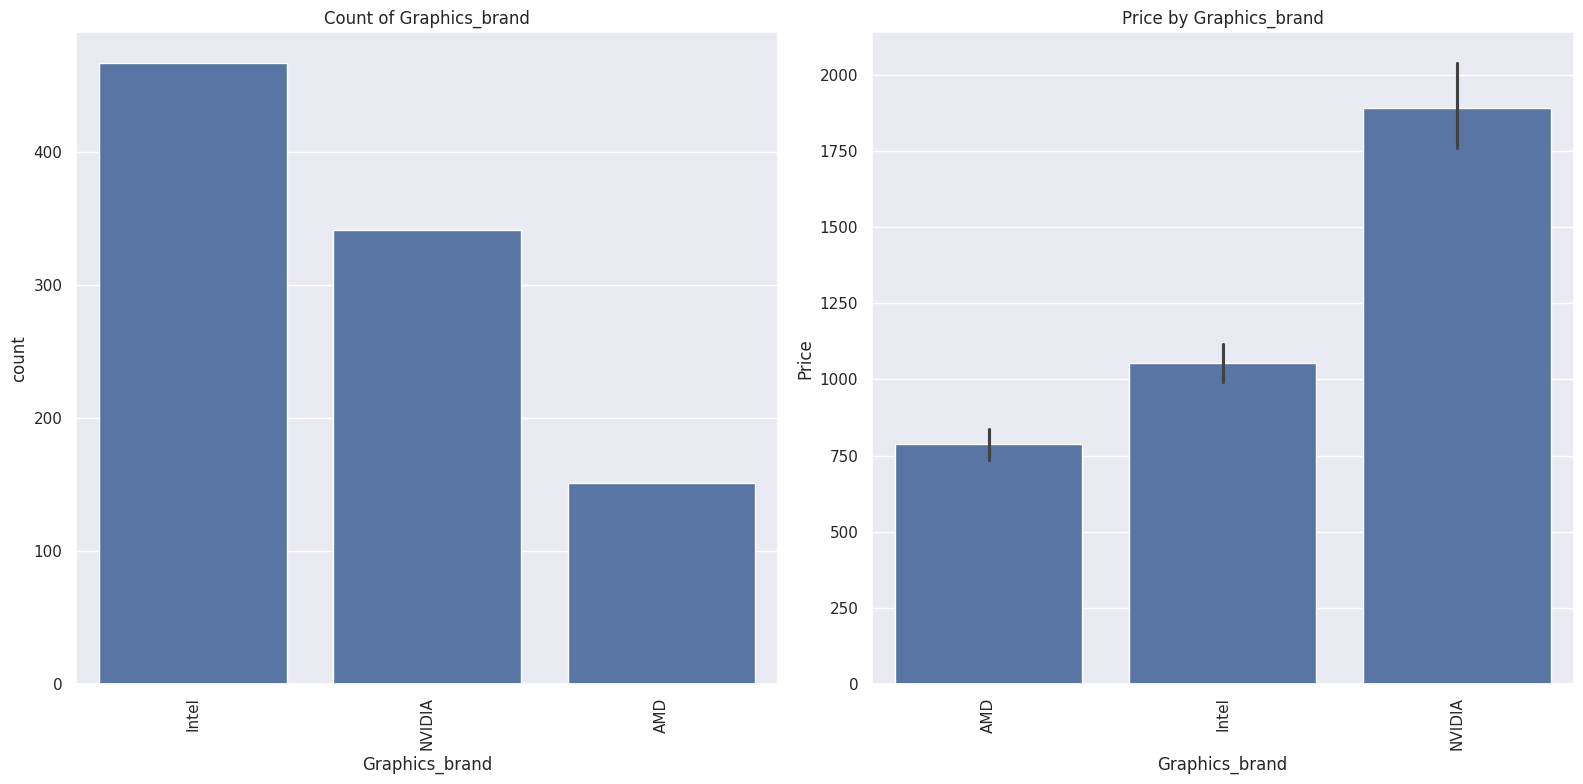

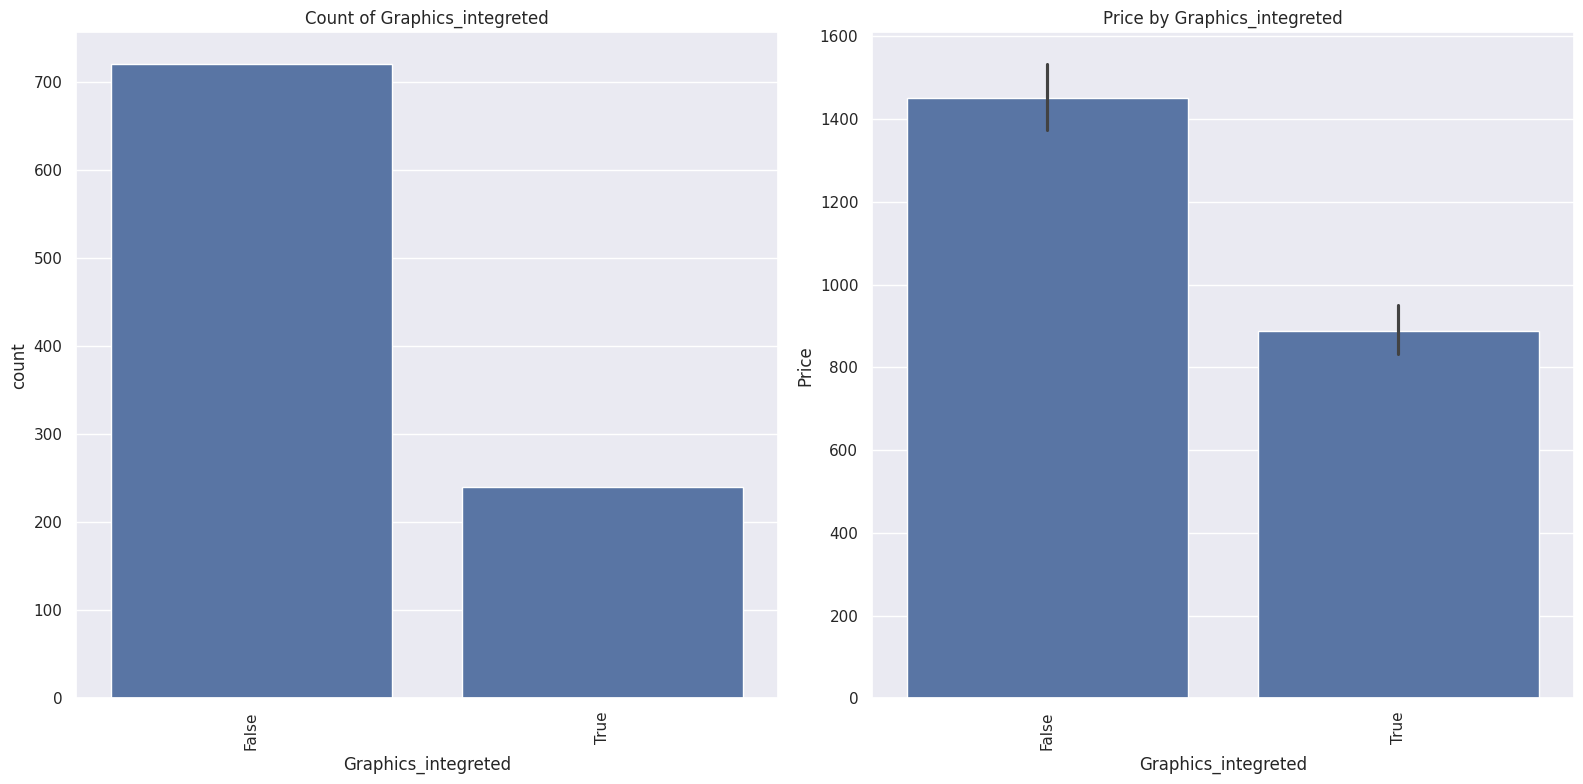

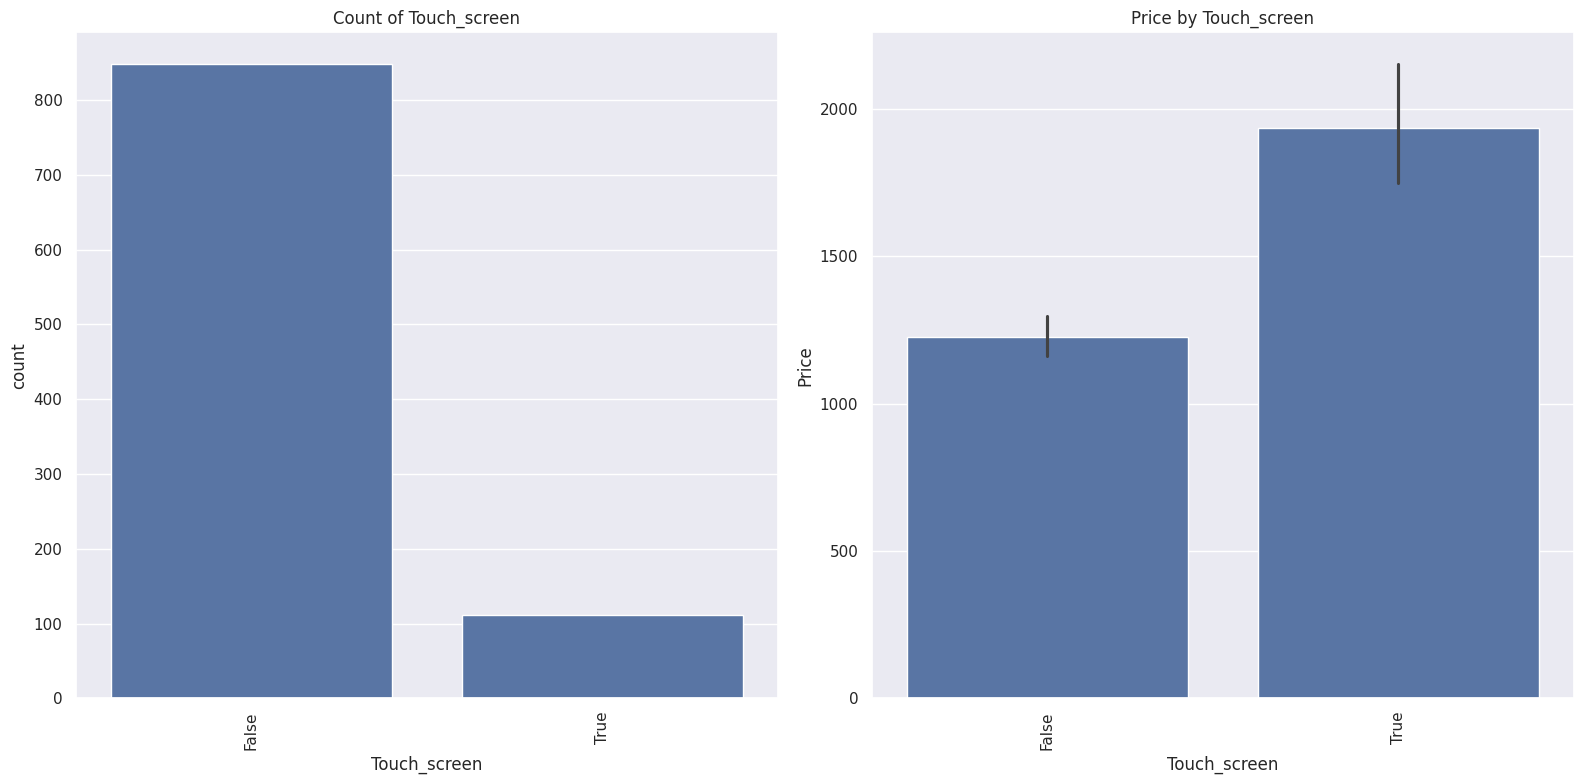

<ipython-input-43-42d829f0afb5>:15: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


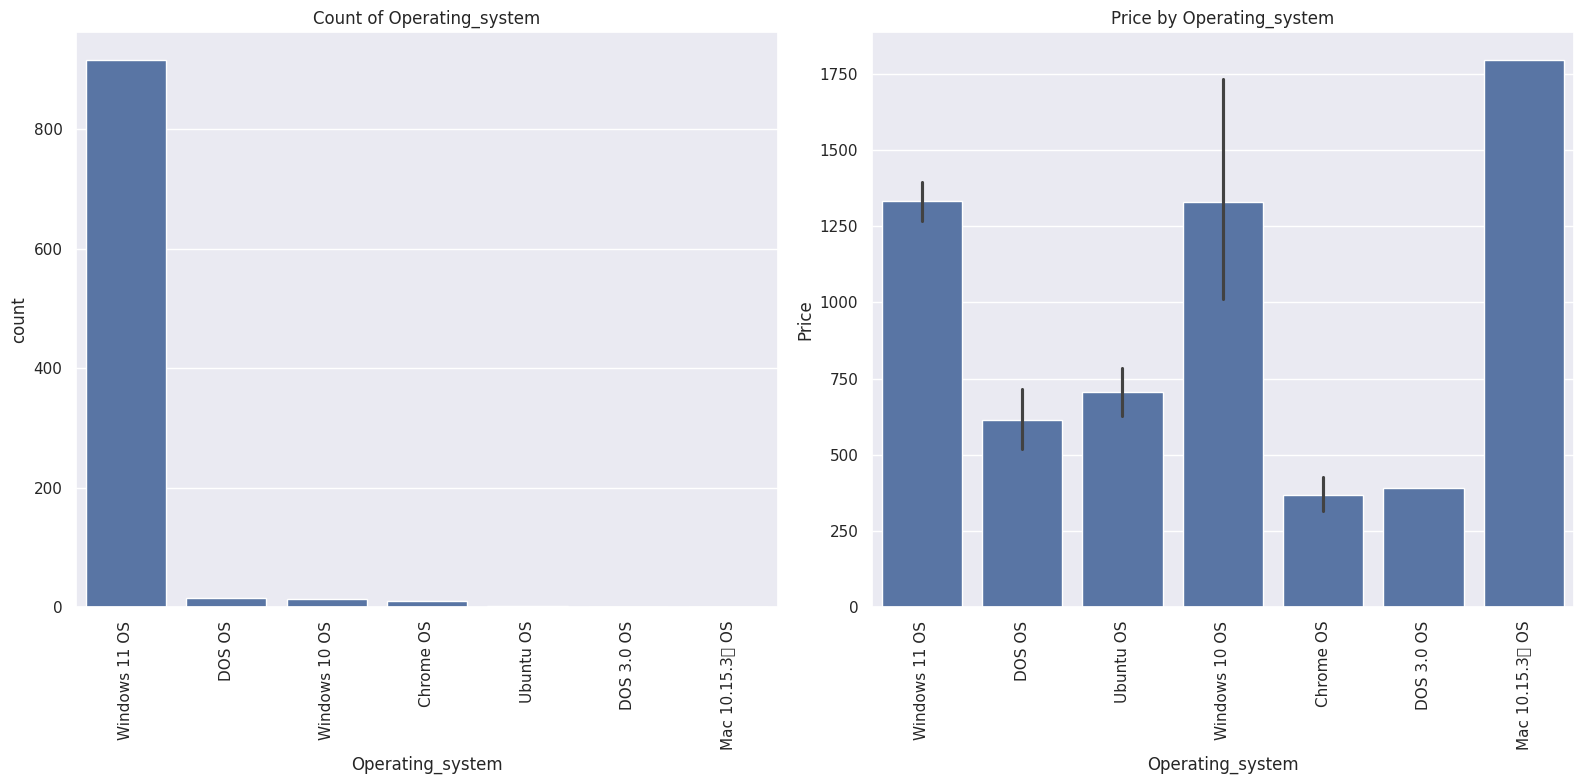

In [ ]:
for var in laptopData_categorical:
    f, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the first bar plot on the first subplot
    sb.barplot(x=laptopData_categorical[var].value_counts().index, y=laptopData_categorical[var].value_counts(), ax=axes[0])
    axes[0].set_title(f'Count of {var}')
    axes[0].tick_params(axis='x', rotation=90)

    # Plot the second bar plot on the second subplot
    sb.barplot(x=laptopData_categorical[var], y=laptopData_clean['Price'], ax=axes[1])
    axes[1].set_title(f'Price by {var}')
    axes[1].tick_params(axis='x', rotation=90)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Display the plots
    plt.show()

**Discussion**


From above, we choose `Processor_Brand` , `Storage_type` and `Touch_screen` as the value counts are easier to analyse.

### **Check the effect of the Categorical Variables on Price**

Introduce `Price` to the dataframe to find relationships with the variables.  

In [ ]:
# Add Price to the dataframe and we will remove Price in the end since already in `laptopData_numeric`
laptopData_categorical = pd.DataFrame(laptopData_clean[["Price", "Processor_brand", "Storage_type" , "Touch_screen"]])
laptopData_categorical.head()


Price Processor_brand Storage_type  Touch_screen
0   822.975180             AMD          SSD          True
1   435.826257             AMD          SSD         False
2   604.376225           Intel          SSD         False
3  1142.880470           Intel          SSD         False
4   391.737427           Intel          SSD         False

The following boxplots display the distribution of `Price` with respect to each categorical variable.

1. `Processor Brand`

<ipython-input-45-2d73933189fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Processor_brand', y='Price', data=laptopData_categorical, order=order, palette='rocket')


<Axes: xlabel='Processor_brand', ylabel='Price'>

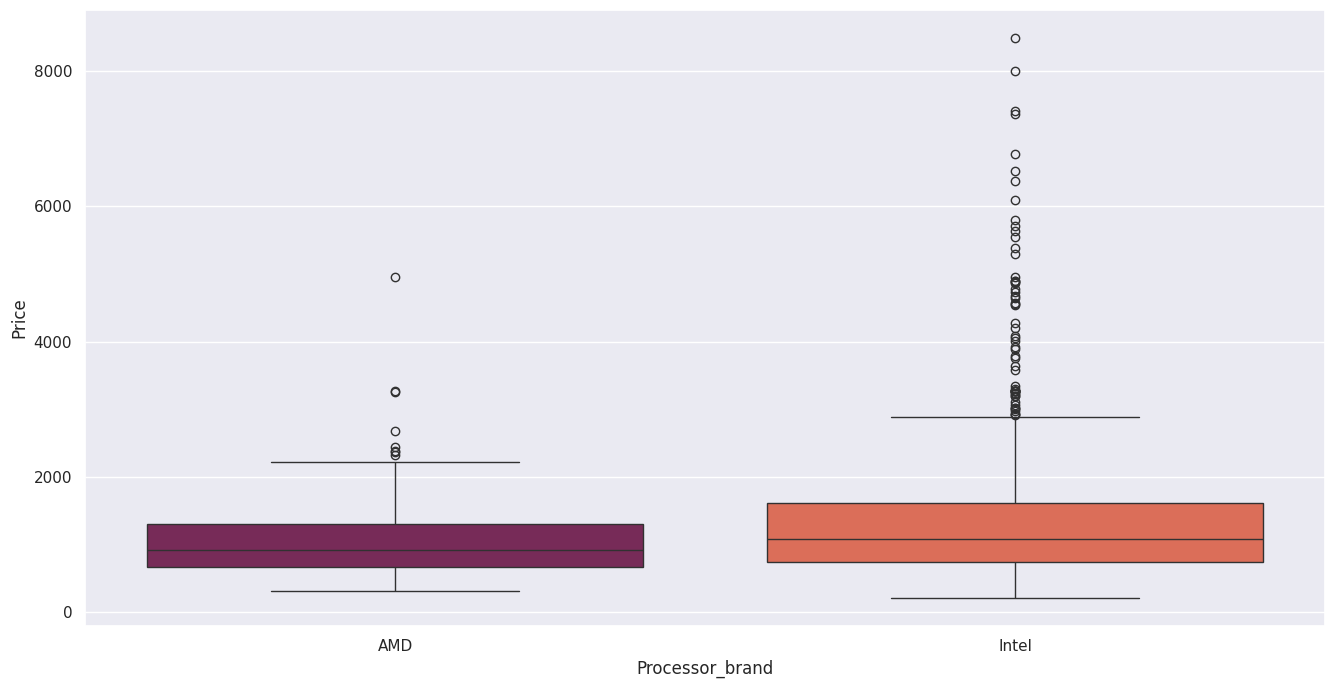

In [ ]:
order = laptopData_categorical.groupby('Processor_brand')['Price'].median().sort_values().index

f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Processor_brand', y='Price', data=laptopData_categorical, order=order, palette='rocket')


Observation:
-  Most of the laptop use `Intel` and `AMD`
- `Intel` have a higher median selling price compared to `AMD`
- `Intel` processor also have a wider interquartile range, reflecting more variation in the selling prices of laptop.


2. `Storage_type`

<ipython-input-46-234a0d65447d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Storage_type', y='Price', data=laptopData_categorical, order=order, palette='rocket')


<Axes: xlabel='Storage_type', ylabel='Price'>

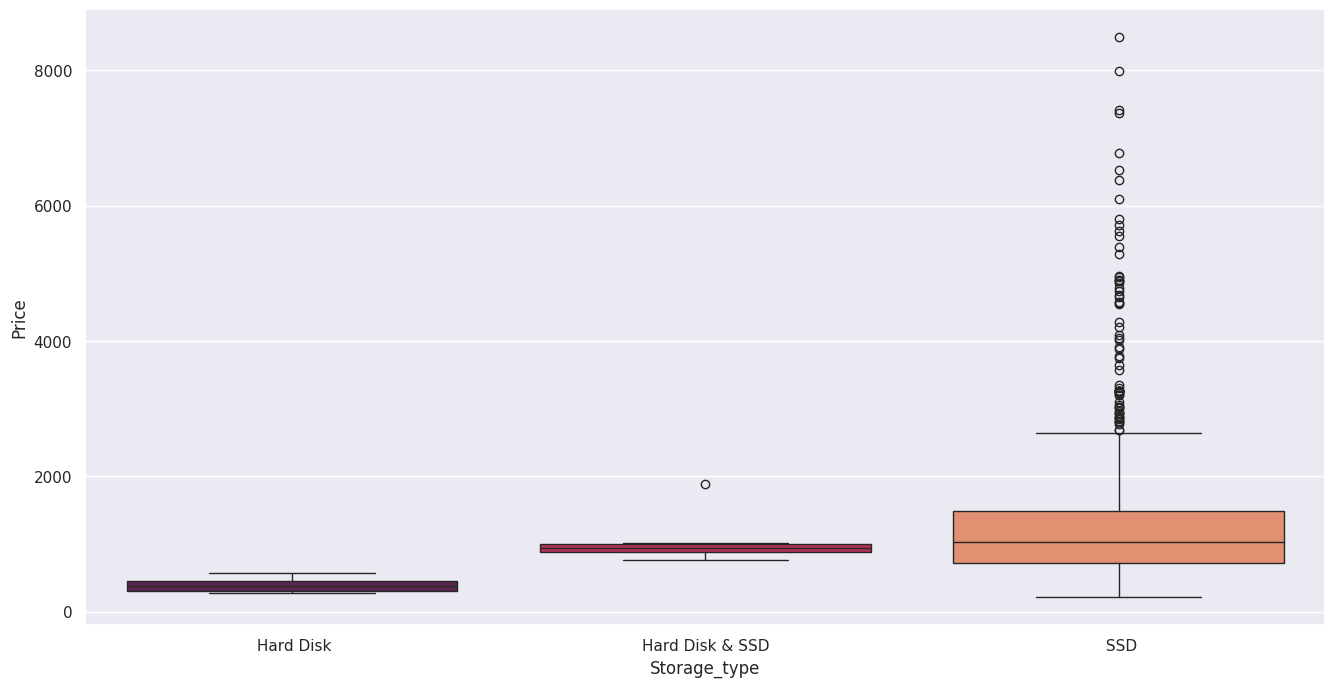

In [ ]:
order = laptopData_categorical.groupby('Storage_type')['Price'].median().sort_values().index

f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Storage_type', y='Price', data=laptopData_categorical, order=order, palette='rocket')

Observation:
- `SSD` have a higher median selling price compared to `Hard Disk & SSD` and `Hard Disk`
- `SSD`  also have a wider interquartile range, reflecting more variation in the selling prices of laptop.
- `Hard Disk & SSD` storage type laptops are priced more than `Hard Disk` laptops while `SSD` laptops are on average, priced more than `Hard Disk` laptops.


3. `Touch_screen`



<ipython-input-47-4a04513dcfbf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Touch_screen', y='Price', data=laptopData_categorical, order=order, palette='rocket')


<Axes: xlabel='Touch_screen', ylabel='Price'>

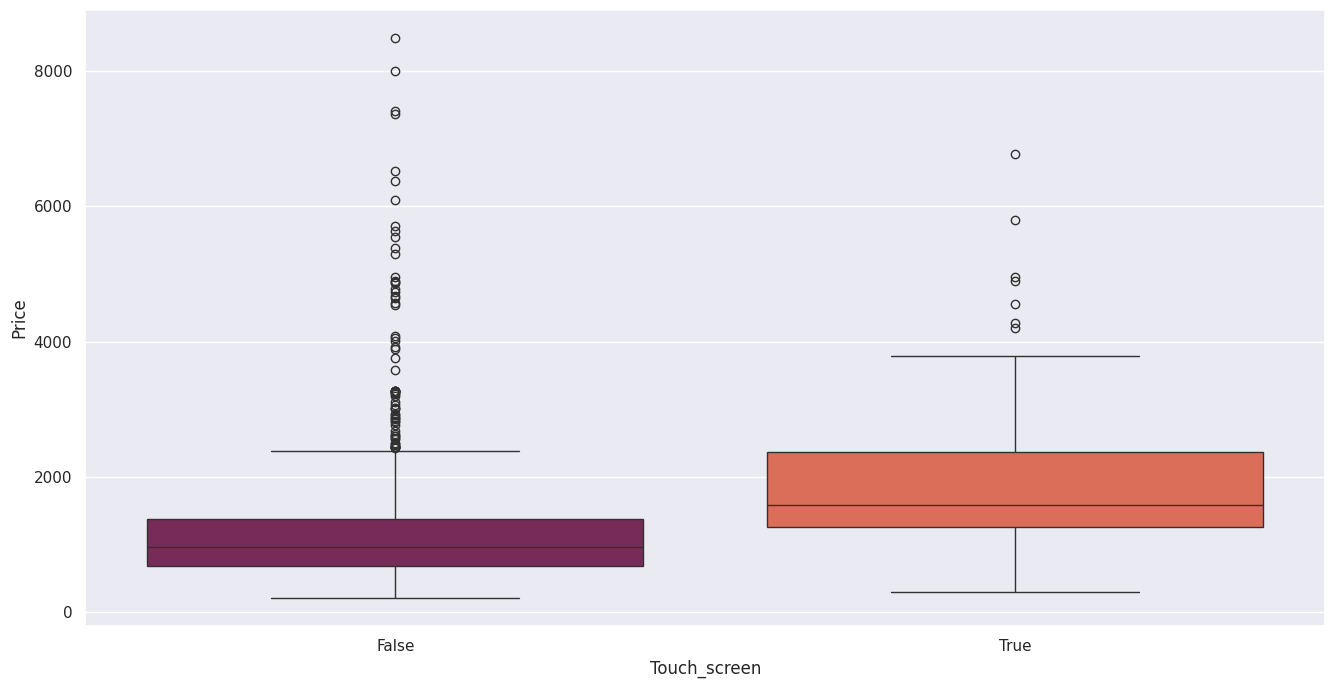

In [ ]:
order = laptopData_categorical.groupby('Touch_screen')['Price'].median().sort_values().index

f = plt.figure(figsize=(16, 8))
sb.boxplot(x='Touch_screen', y='Price', data=laptopData_categorical, order=order, palette='rocket')

Observation:

- `Touchscreen` laptop have a higher median selling price.

## **Conclusion**

We have chose 3 numerical predictors which are in the data frame `laptopData_numerical` containing `RAM_GB`, `Storage_capacity_GB` and `Vertical_pixel`.

For categorical predictors, we have the data frame `laptopData_categorical` containing 3 predictors which are `Processor Brand`, `Storage_type` and `Touch_screen`.

---
# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

Firstly, we combine numerical and categorical data frames.

In [ ]:
laptopData_categorical = laptopData_categorical.drop(columns=['Price'])

In [ ]:
laptopData_combined = pd.concat([laptopData_numeric, laptopData_categorical], axis=1)
laptopData_combined

Price  RAM_GB  Storage_capacity_GB  Vertical_pixel  \
0      822.975180       8                  512            1080   
1      435.826257       8                  512            1080   
2      604.376225       8                  512            1080   
3     1142.880470      16                  512            1920   
4      391.737427       8                  512            1080   
...           ...     ...                  ...             ...   
1015  4049.624428      32                 1000            1600   
1016  4784.291313      32                 1000            2400   
1017   960.156760       8                  512            1080   
1018   898.089484       8                  512            1200   
1019  1542.945787       8                  512            1200   

     Processor_brand Storage_type  Touch_screen  
0                AMD          SSD          True  
1                AMD          SSD         False  
2              Intel          SSD         False  
3              Intel          SSD         False  
4              Intel          SSD         False  
...              ...          ...           ...  
1015           Intel          SSD         False  
1016           Intel          SSD         False  
1017             AMD          SSD         False  
1018             AMD          SSD         False  
1019           Intel          SSD          True  

[960 rows x 7 columns]

In [ ]:
laptopData_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                960 non-null    float64
 1   RAM_GB               960 non-null    int64  
 2   Storage_capacity_GB  960 non-null    int64  
 3   Vertical_pixel       960 non-null    int64  
 4   Processor_brand      960 non-null    object 
 5   Storage_type         960 non-null    object 
 6   Touch_screen         960 non-null    bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 53.4+ KB


### **One-Hot Encoding**

One-hot encoding is a method used to convert categorical data into a numerical format that can be used by machine learning models. It is a technique that transforms a categorical variable with multiple distinct categories into a binary (0 or 1) representation for each category.

In [ ]:
laptopData_combined = pd.get_dummies(laptopData_combined,drop_first=True)

In [ ]:
laptopData_combined

Price  RAM_GB  Storage_capacity_GB  Vertical_pixel  Touch_screen  \
0      822.975180       8                  512            1080          True   
1      435.826257       8                  512            1080         False   
2      604.376225       8                  512            1080         False   
3     1142.880470      16                  512            1920         False   
4      391.737427       8                  512            1080         False   
...           ...     ...                  ...             ...           ...   
1015  4049.624428      32                 1000            1600         False   
1016  4784.291313      32                 1000            2400         False   
1017   960.156760       8                  512            1080         False   
1018   898.089484       8                  512            1200         False   
1019  1542.945787       8                  512            1200          True   

      Processor_brand_Intel  Storage_type_ SSD  Storage_type_Hard Disk & SSD  
0                     False               True                         False  
1                     False               True                         False  
2                      True               True                         False  
3                      True               True                         False  
4                      True               True                         False  
...                     ...                ...                           ...  
1015                   True               True                         False  
1016                   True               True                         False  
1017                  False               True                         False  
1018                  False               True                         False  
1019                   True               True                         False  

[960 rows x 8 columns]

In [ ]:
laptopData_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         960 non-null    float64
 1   RAM_GB                        960 non-null    int64  
 2   Storage_capacity_GB           960 non-null    int64  
 3   Vertical_pixel                960 non-null    int64  
 4   Touch_screen                  960 non-null    bool   
 5   Processor_brand_Intel         960 non-null    bool   
 6   Storage_type_ SSD             960 non-null    bool   
 7   Storage_type_Hard Disk & SSD  960 non-null    bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 41.2 KB


Now, we have a total of 6 predictors and 960 rows in our data set.

---

# **Machine Learning**

## **1. Linear Regression**

First, we perform LinearRegression to find out the relationship between the numeric predictors with the response variable, Price. A summary is shown below.

* Response Variable : `Price`
* Predictors (numeric) : `RAM_GB`, `Storage_capacity_GB`, `Vertical_pixel`





### **Uni-Variate Linear Regression**
We will start by setting up a Uni-Variate Linear Regression problem.

Response Variable : `Price`  
Predictor Feature: `RAM_GB`, `Storage_capacity_GB`, `Vertical_pixel`   
  
> Regression Model 1 : Price = $a\ \ \times\ $RAM_GB + $b$   
> Regression Model 2 : Price = $a\ \ \times\ $Storage_capacity_GB + $b$  
> Regression Model 3 : Price = $a\ \ \times\ $Vertical_pixel + $b$    

Extract the variables and the associated as a Pandas DataFrame

In [ ]:
price = pd.DataFrame(laptopData_combined['Price'])
ram_gb = pd.DataFrame(laptopData_combined['RAM_GB'])
storage_capacity_gb = pd.DataFrame(laptopData_combined['Storage_capacity_GB'])
vertical_pixel = pd.DataFrame(laptopData_combined['Vertical_pixel'])

**Regression with Random Train-Test Split**  
Split the Train and Test set randomly, and perform Linear Regression

Results for RAM_GB
Intercept of Regression 	: b = [-312.52383191]
Coefficient of Regression 	: a = [115.47861]
Goodness of Fit (R^2) for Train Data 	: 0.5937892314432227
Goodness of Fit (R^2) for Test Data 	: 0.5795842853445092
Mean Squared Error (MSE) for Train Data 	: 420381.88105452555
Mean Squared Error (MSE) for Test Data 	: 444526.0072530679



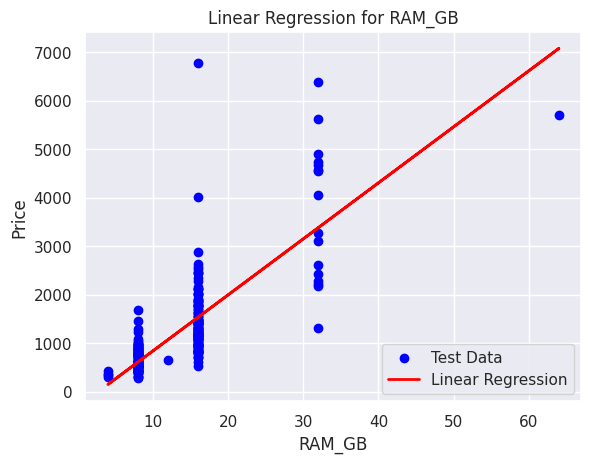

Results for Storage_Capacity_GB
Intercept of Regression 	: b = [-110.47146941]
Coefficient of Regression 	: a = [2.24954682]
Goodness of Fit (R^2) for Train Data 	: 0.454455272233384
Goodness of Fit (R^2) for Test Data 	: 0.4081975420444347
Mean Squared Error (MSE) for Train Data 	: 564576.659729428
Mean Squared Error (MSE) for Test Data 	: 625741.5566235739



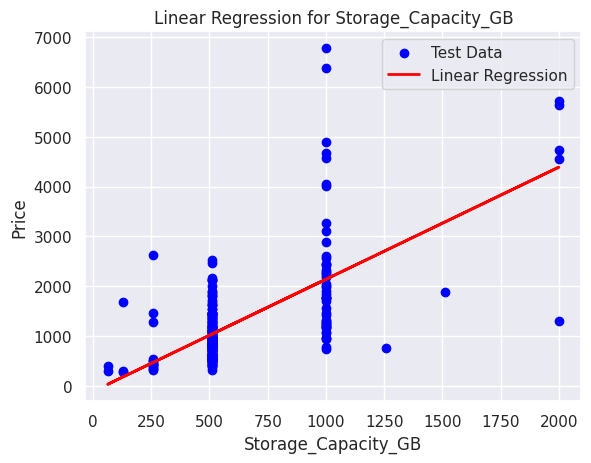

Results for Vertical_pixel
Intercept of Regression 	: b = [-1628.86814016]
Coefficient of Regression 	: a = [2.45472406]
Goodness of Fit (R^2) for Train Data 	: 0.44750696770821385
Goodness of Fit (R^2) for Test Data 	: 0.37505630084195285
Mean Squared Error (MSE) for Train Data 	: 571767.3635524914
Mean Squared Error (MSE) for Test Data 	: 660783.4047600604



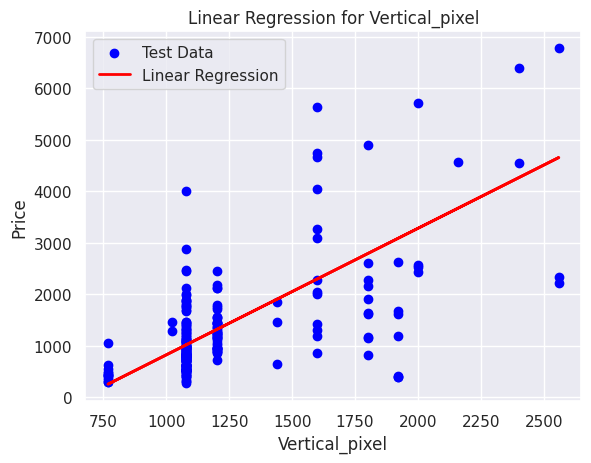

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the Dataset into Train and Test for all predictors using the same random state
random_state = 42

# For RAM_GB predictor
X_train_ram, X_test_ram, y_train, y_test = train_test_split(ram_gb, price, test_size=0.25, random_state=random_state)

# For Storage_Capacity_GB predictor
X_train_storage, X_test_storage, y_train, y_test = train_test_split(storage_capacity_gb, price, test_size=0.25, random_state=random_state)

# For Vertical_pixel predictor
X_train_vertical, X_test_vertical, y_train, y_test = train_test_split(vertical_pixel, price, test_size=0.25, random_state=random_state)

# Linear Regression for RAM_GB
linreg_ram = LinearRegression()
linreg_ram.fit(X_train_ram, y_train)

# Linear Regression for Storage_Capacity_GB
linreg_storage = LinearRegression()
linreg_storage.fit(X_train_storage, y_train)

# Linear Regression for Vertical_pixel
linreg_vertical = LinearRegression()
linreg_vertical.fit(X_train_vertical, y_train)

# Function to print coefficients and goodness of fit
def print_results(linreg, X_train, X_test, y_train, y_test, label):
    print("Results for", label)
    print("Intercept of Regression \t: b =", linreg.intercept_)
    print("Coefficient of Regression \t: a =", linreg.coef_[0])
    print("Goodness of Fit (R^2) for Train Data \t:", linreg.score(X_train, y_train))
    print("Goodness of Fit (R^2) for Test Data \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) for Train Data \t:", mean_squared_error(y_train, linreg.predict(X_train)))
    print("Mean Squared Error (MSE) for Test Data \t:", mean_squared_error(y_test, linreg.predict(X_test)))
    print()

# Function to plot linear regression line along with test values
def plot_regression(linreg, X_test, y_test, label):
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    plt.plot(X_test, linreg.predict(X_test), color='red', linewidth=2, label='Linear Regression')
    plt.xlabel(label)
    plt.ylabel('Price')
    plt.title('Linear Regression for ' + label)
    plt.legend()
    plt.show()

# Print results for RAM_GB
print_results(linreg_ram, X_train_ram, X_test_ram, y_train, y_test, "RAM_GB")

# Plot linear regression for RAM_GB
plot_regression(linreg_ram, X_test_ram, y_test, 'RAM_GB')

# Print results for Storage_Capacity_GB
print_results(linreg_storage, X_train_storage, X_test_storage, y_train, y_test, "Storage_Capacity_GB")

# Plot linear regression for Storage_Capacity_GB
plot_regression(linreg_storage, X_test_storage, y_test, 'Storage_Capacity_GB')

# Print results for Vertical_pixel
print_results(linreg_vertical, X_train_vertical, X_test_vertical, y_train, y_test, "Vertical_pixel")

# Plot linear regression for Vertical_pixel
plot_regression(linreg_vertical, X_test_vertical, y_test, 'Vertical_pixel')

We can see some correlation between the numerical variables and the Price, but it's at most only moderately strong. We will try Multiple Linear Regression to perhaps get a better result.

### **Multiple Linear Regression**

Multiple Linear Regression is a statistical modeling technique that quantifies the linear relationship between a dependent variable and two or more independent variables, allowing for the prediction of the dependent variable based on a combination of these predictor variables. The equation for multiple linear regression can be expressed as:

$\text{Price} = a + b \times \text{ RAM_GB } + c \times \text{ Storage_capacity_GB } + d \times \text{ Vertical_pixel }$

Where:
- `Price` is the response variable
- `RAM_GB`, `Storage_capacity_GB`, `Vertical_pixel` are the predictor variables
- $a$ is the y-intercept
- $b, c, d$ are the coefficients for each predictors

The goal is to estimate the values of the coefficients that provide the best-fit hyperplane.

Intercept of Regression: a = [-1589.12672444]
Coefficients of Regression:
   Coefficient for RAM_GB: 65.59587919895597
   Coefficient for Storage_capacity_GB: 0.8181843703835958
   Coefficient for Vertical_pixel: 1.218591820278586

Goodness of Fit of Model on Train Dataset
Explained Variance (R^2): 0.7247379050109457
Mean Squared Error (MSE): 284864.9179972054

Goodness of Fit of Model on Test Dataset
Explained Variance (R^2): 0.6624378581238661
Mean Squared Error (MSE): 356920.8901978224


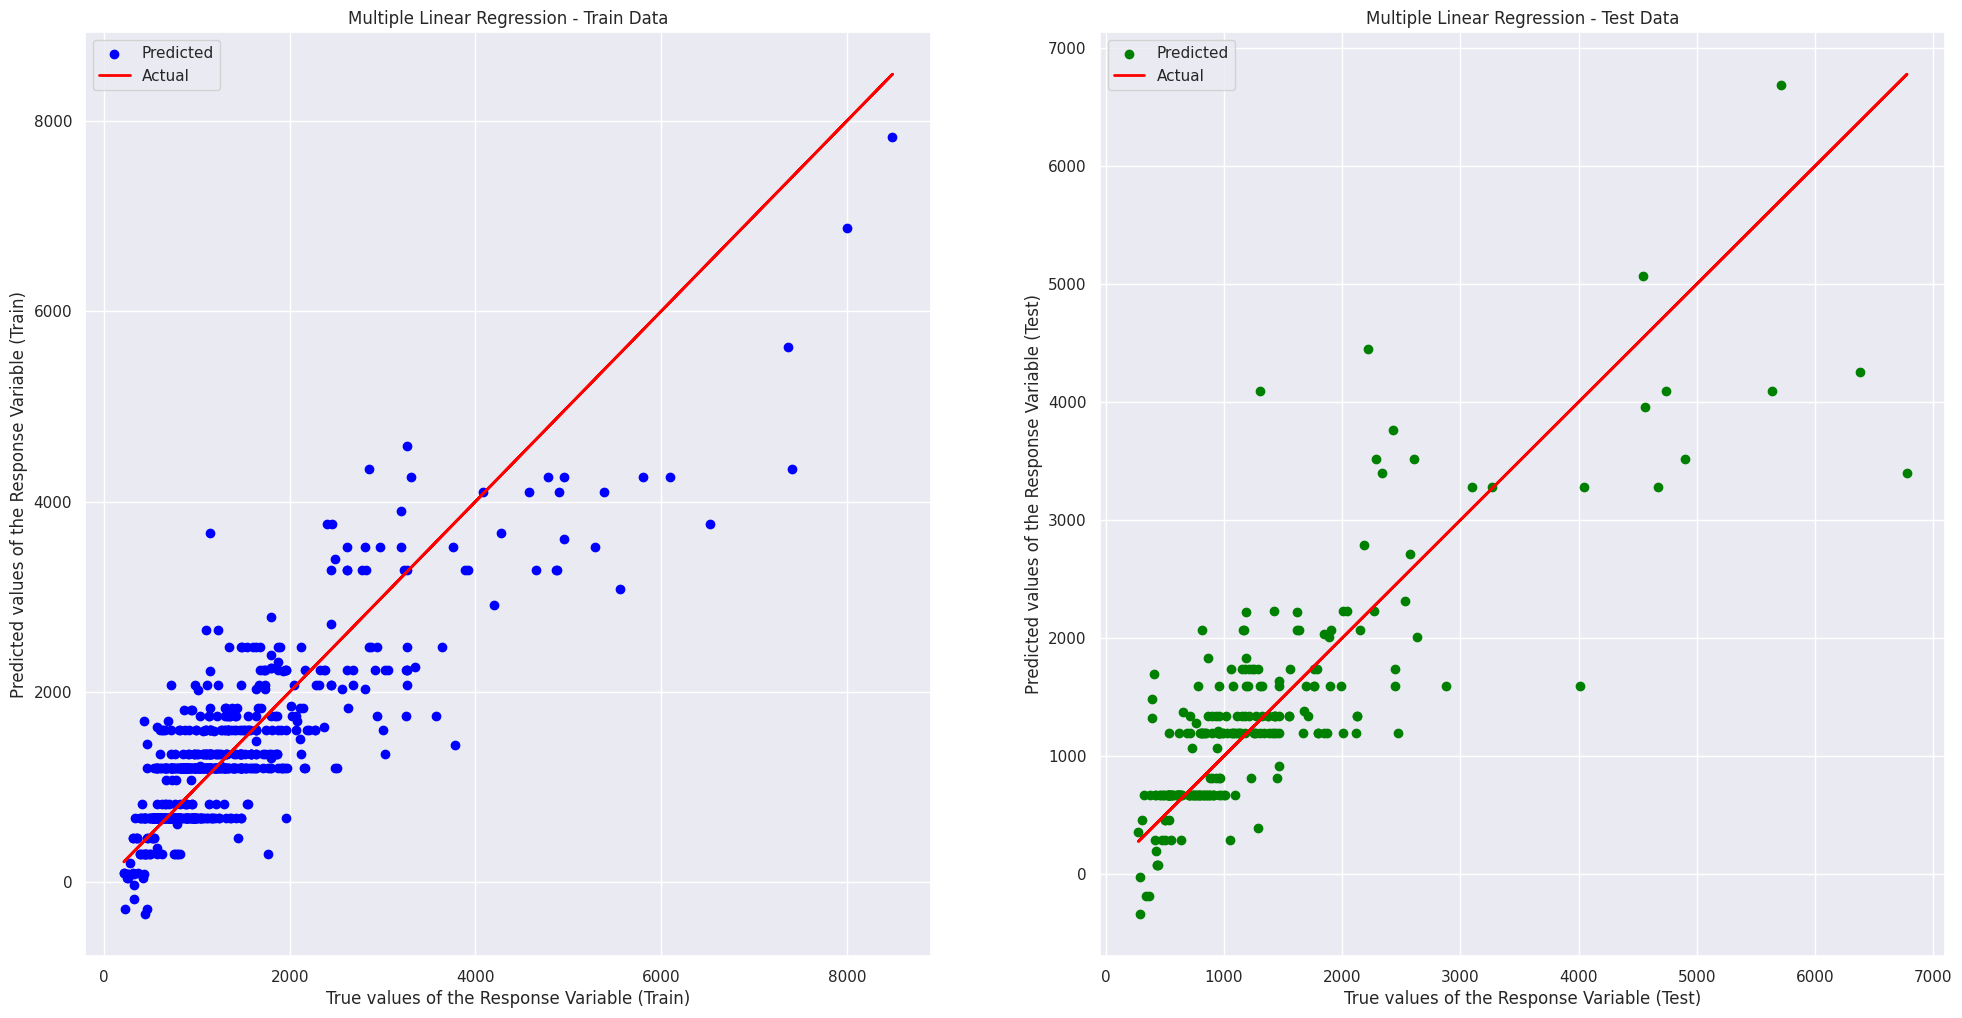

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Combine predictor variables into a single feature matrix
X = pd.concat([ram_gb, storage_capacity_gb, vertical_pixel], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.25, random_state=42)

# Initialize and fit the multiple linear regression model
multi_linreg = LinearRegression()
multi_linreg.fit(X_train, y_train)

# Coefficients of the Multiple Linear Regression model
print("Intercept of Regression: a =", multi_linreg.intercept_)
print('Coefficients of Regression:')
for i, coef in enumerate(multi_linreg.coef_[0]):
    print(f"   Coefficient for {X.columns[i]}: {coef}")

# Predict Price corresponding to RAM_GB, Storage_Capacity_GB, and Vertical_pixel
y_train_pred = multi_linreg.predict(X_train)
y_test_pred = multi_linreg.predict(X_test)

# Check the Goodness of Fit (R^2) on train and test data
print("\nGoodness of Fit of Model on Train Dataset")
print("Explained Variance (R^2):", multi_linreg.score(X_train, y_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))

print("\nGoodness of Fit of Model on Test Dataset")
print("Explained Variance (R^2):", multi_linreg.score(X_test, y_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))

import matplotlib.pyplot as plt

# Plot the Predictions vs the True values for Train and Test Data side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot for Train Data
axes[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
axes[0].plot(y_train, y_train, color='red', label='Actual', linewidth=2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Multiple Linear Regression - Train Data")
axes[0].legend()

# Plot for Test Data
axes[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
axes[1].plot(y_test, y_test, color='red', label='Actual', linewidth=2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Multiple Linear Regression - Test Data")
axes[1].legend()

plt.show()

We have a much better result now using the Multiple Linear Regression.
* The coefficient for `RAM_GB` is approximately 65.60. This means that for every one-unit increase in `RAM_GB`, the predicted price is expected to increase by approximately 65.60, holding all other variables constant.
* The coefficient for `Storage_capacity_GB` is approximately 0.82. This means that for every one-unit increase in `Storage_capacity_GB`, the predicted price is expected to increase by approximately 0.82, holding all other variables constant.
* The coefficient for `Vertical_pixel` is approximately 1.22. This means that for every one-unit increase in `Vertical_pixel`, the predicted price is expected to increase by approximately 1.22, holding all other variables constant.  

Since the coefficient for `RAM_GB` is the largest among the three predictors, it indicates that `RAM_GB` has the most significant impact on the predicted price among these predictors. Similarly, `Vertical_pixel` has a larger impact compared to `Storage_capacity_GB`. Therefore, based on the magnitudes of the coefficients, we can infer that `RAM_GB` is the most important predictor, followed by `Vertical_pixel`, and then `Storage_capacity_GB`.    

**Evaluating results from both Uni-variate and Multiple Linear Regression**

In the Uni-Variate Linear Regression,   
    Goodness of Fit (R^2) for Test Data of Vertical_pixel	    : 0.37505630084195285  
    Goodness of Fit (R^2) for Test Data of Storage_capacity_GB	: 0.4081975420444347   
But in the Multiple Linear Regression, somehow the coefficient for Vertical_pixel is higher than that of Storage_capacity_GB.   
  
The interpretation of the importance of predictor variables in a univariate linear regression model versus a multiple linear regression model can sometimes be different. In a univariate linear regression model, the coefficient of determination (R^2) can give an indication of how well the model fits the data, but it doesn't necessarily reflect the importance of the predictor variable in predicting the response variable.

In a multiple linear regression model, the importance of a predictor variable is determined by its coefficient, which represents the change in the response variable for a one-unit change in that predictor, holding all other predictors constant.

The coefficient for `Storage_Capacity_GB` in the multiple linear regression model is smaller than the coefficient for `Vertical_pixel`, indicating that `Vertical_pixel` has a larger impact on the predicted price compared to `Storage_Capacity_GB`, even though the R^2 value for `Storage_Capacity_GB` may be higher.

So, even though the R^2 value for `Storage_Capacity_GB` may be higher, the magnitude of its coefficient in the multiple linear regression model suggests that it has a smaller impact on the predicted price compared to `Vertical_pixel`. Therefore, `Vertical_pixel` may still be considered more important in predicting the price based on the coefficients of the multiple linear regression model.

---

## **2. Random Forest**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. You can imagine that we have a tree previously, but now we have a forest, so that we can now return a result which is more accurate.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

By using random forest, we are going to use all the predictors we have to predict the Price.

Import the essential libraries.







In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

We split data into training and testing sets.

In [ ]:
X = laptopData_combined.drop('Price', axis=1)  # Features
y = laptopData_combined['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create a RandomForestClassifier object with the following parameters:

>n_estimators: 100\
max_depth: 42\
Leaving other parameters as default

Fit the model using the train and test data.

In [ ]:
ranforest = RandomForestRegressor(n_estimators=100, random_state=42)
ranforest.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
y_train_pred = ranforest.predict(X_train)
y_test_pred = ranforest.predict(X_test)

**Visualize a Tree:**
We extract one of the decision trees from the trained random forest model.

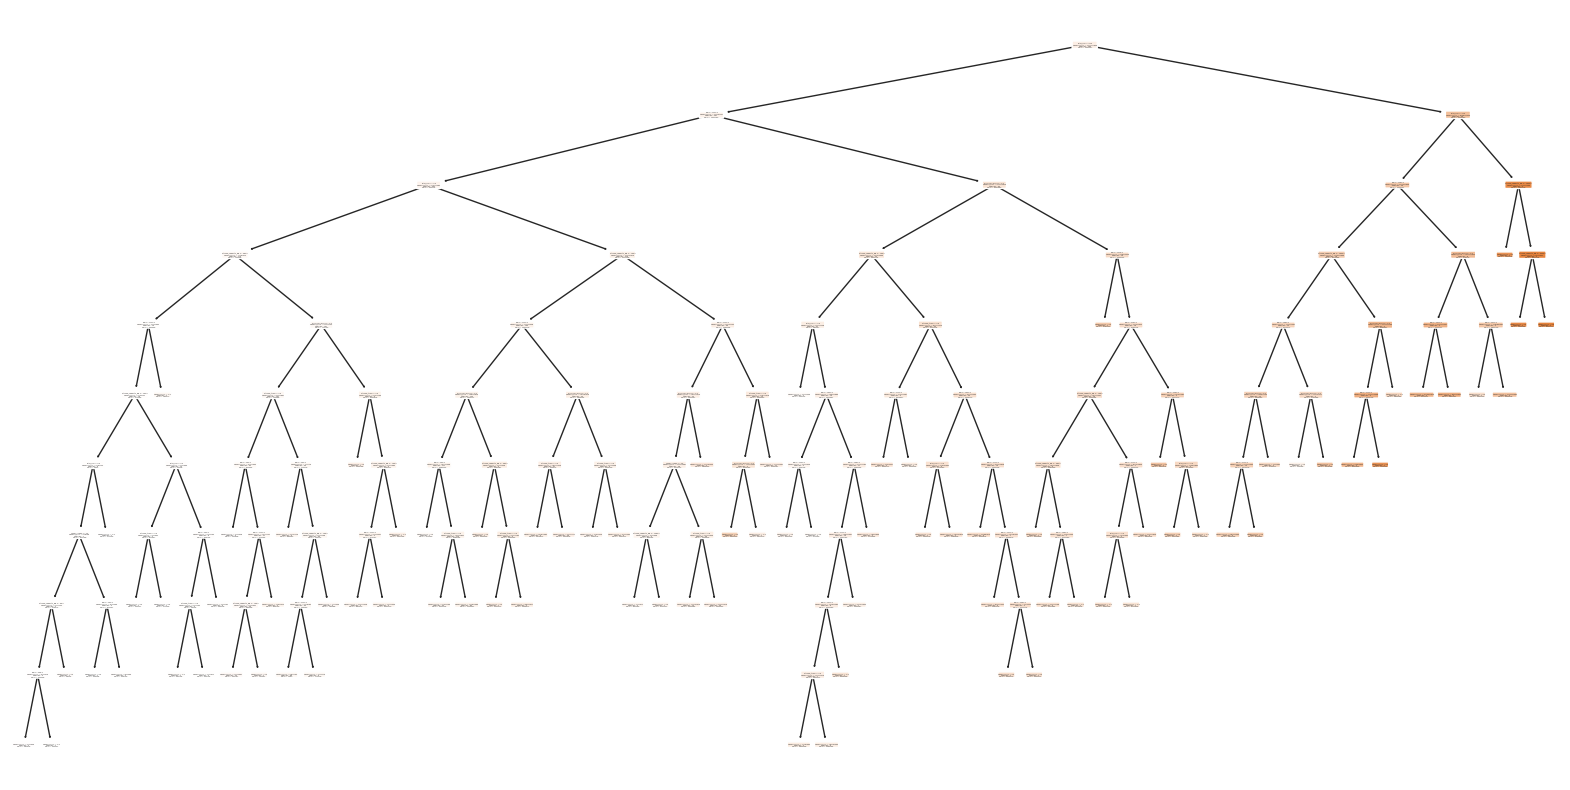

In [ ]:
# Choose an index to select one of the decision trees from the random forest model
tree_index = 0  # You can select a different index to visualize other trees

# Extract the decision tree at the chosen index
tree = ranforest.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=['RAM_GB', 'Storage_capacity_GB', 'ppi', 'Processor_Brand', 'Storage_type', 'Touch_screen'],
          filled=True, rounded=True)
plt.show()

**Visualize the prediction**

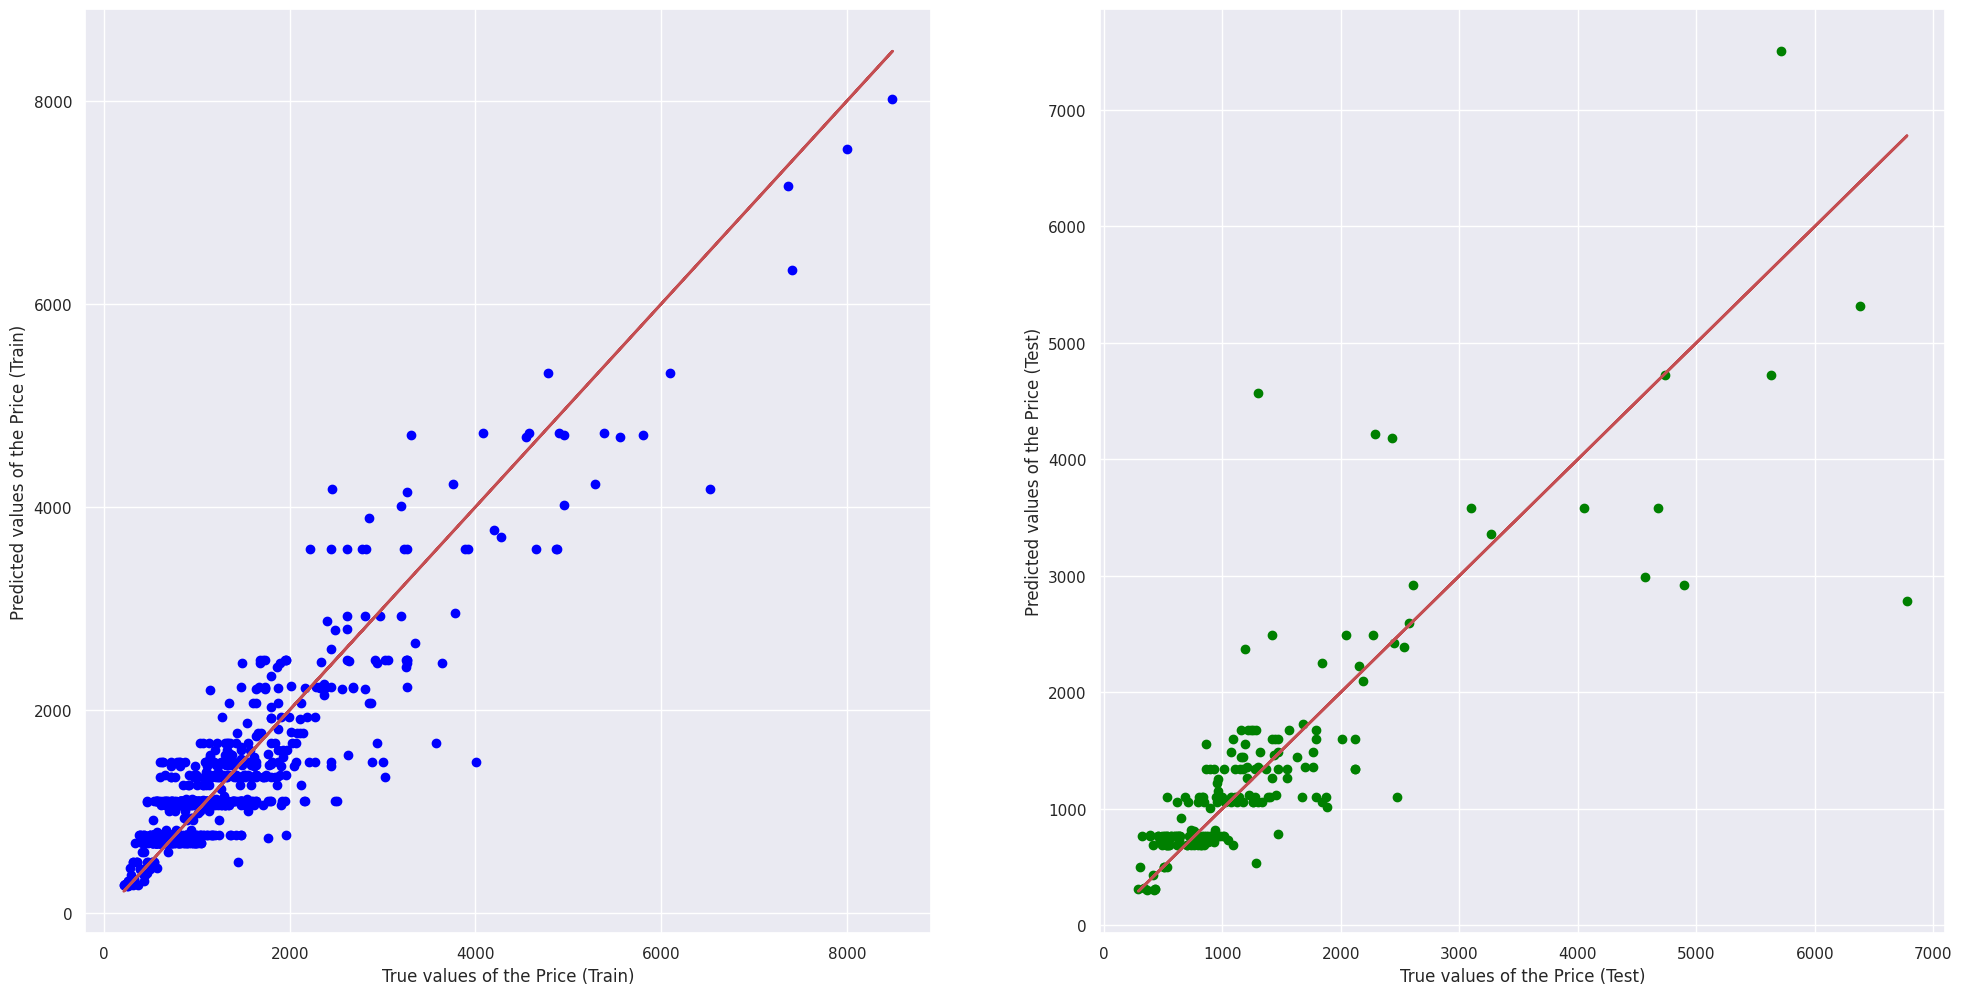

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Price (Train)")
axes[0].set_ylabel("Predicted values of the Price (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Price (Test)")
axes[1].set_ylabel("Predicted values of the Price (Test)")
plt.show()


- **Training Set**: The scatter plot for the predicted value(blue dots) shows a very tight fit, with most of the predicted values lying close to the true values(red line), particularly in lower prices region. This indicates a very good fit on the training set, but such a tight fit can sometimes be a sign of overfitting.
  
- **Testing Set**: The scatter plot for the predicted value(green dots) deviate more from the true value(red line) compared to the training set. The deviation is particularly high for higher prices value, suggest the model has room for improvement in generalizing to new data.

**Evaluate Model Performance**

In [ ]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ranforest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ranforest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8285298667638614
Mean Squared Error (MSE) 	: 175061.87730160114

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6957592341740708
Mean Squared Error (MSE) 	: 340374.60986594536



- **R-squared**: The R-squared values are 0.829 for the training set and 0.696 for the test set. The higher value in training set suggests that the model fits the training data extremely well but does not perform as well on the test data, which is unusual and might be due to potential overfitting.

- **Mean Squared Error (MSE)**: The MSE values are 175061.88 for traning set and 340374.61 for the test set. The much lower MSE in training set also suggested that the model perform better on training set compared to test set, which contribute to a higher chance of overfitiing.

**Comments and Considerations**

- **Overfitting Concerns**: The concern with overfitting is raised by the higher R^2 value on training set and a lower MSE value on training set compared to test set. These values suggested that the model is actually performing better on training set compared to test set, which may be a result of the model is overtuned to the train data.  To address this issue, methods such as removing outliers, tuning hyperparameters, reducing the maximum depth of the trees, increasing the number of estimators, or adjusting the minimum samples split might be useful.

The Random Forest Regressor has demonstrated strong predictive power, especially on the training set. However, the potential overfitting might limit its effectiveness on new data. In conclusion, there is a room for improvement for the model.

### **Random Forest with outliers removed**

An outlier removal process is a critical step because outliers can have a disproportionate effect on regression models, skewing the results and potentially leading to poor generalization on unseen data.


In [ ]:
# Calculate outliers mask for numeric columns
q1 = laptopData_numeric.quantile(0.25)
q3 = laptopData_numeric.quantile(0.75)
iqr = q3-q1
numeric_outliers_mask = ((laptopData_numeric < q1-1.5*iqr) | (laptopData_numeric > q3+1.5*iqr)).any(axis=1)

In [ ]:
# Select boolean columns
boolean_columns = laptopData_combined.select_dtypes(include=['bool'])

# For boolean columns, outliers don't apply
boolean_outliers_mask = pd.Series(False, index=laptopData_combined.index)

# Combine masks for numeric and boolean columns
outliers_mask =  numeric_outliers_mask | boolean_outliers_mask

In [ ]:
# Filter the DataFrame to exclude rows identified as outliers
laptop_no_outliers = laptopData_combined[~outliers_mask]
laptop_no_outliers

Price  RAM_GB  Storage_capacity_GB  Vertical_pixel  Touch_screen  \
0      822.975180       8                  512            1080          True   
1      435.826257       8                  512            1080         False   
2      604.376225       8                  512            1080         False   
4      391.737427       8                  512            1080         False   
5      701.992162       8                  512            1080         False   
...           ...     ...                  ...             ...           ...   
1013  1032.331809       8                  512            1080         False   
1014   963.259308       8                  512            1080         False   
1017   960.156760       8                  512            1080         False   
1018   898.089484       8                  512            1200         False   
1019  1542.945787       8                  512            1200          True   

      Processor_brand_Intel  Storage_type_ SSD  Storage_type_Hard Disk & SSD  
0                     False               True                         False  
1                     False               True                         False  
2                      True               True                         False  
4                      True               True                         False  
5                      True               True                         False  
...                     ...                ...                           ...  
1013                   True               True                         False  
1014                   True               True                         False  
1017                  False               True                         False  
1018                  False               True                         False  
1019                   True               True                         False  

[600 rows x 8 columns]

After removing outliers, we have 600 rows left.
Now, we attempt to train Random Forest to predict the Price again.

In [ ]:
X_no_out = laptop_no_outliers.drop('Price', axis=1)  # Features
y_no_out = laptop_no_outliers['Price']  # Target variable

X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(X_no_out, y_no_out, test_size=0.2, random_state=42)


In [ ]:
ranforest = RandomForestRegressor(n_estimators=100, random_state=42)
ranforest.fit(X_train_no_out, y_train_no_out)


RandomForestRegressor(random_state=42)

In [ ]:
y_train_no_out_pred = ranforest.predict(X_train_no_out)
y_test_no_out_pred = ranforest.predict(X_test_no_out)

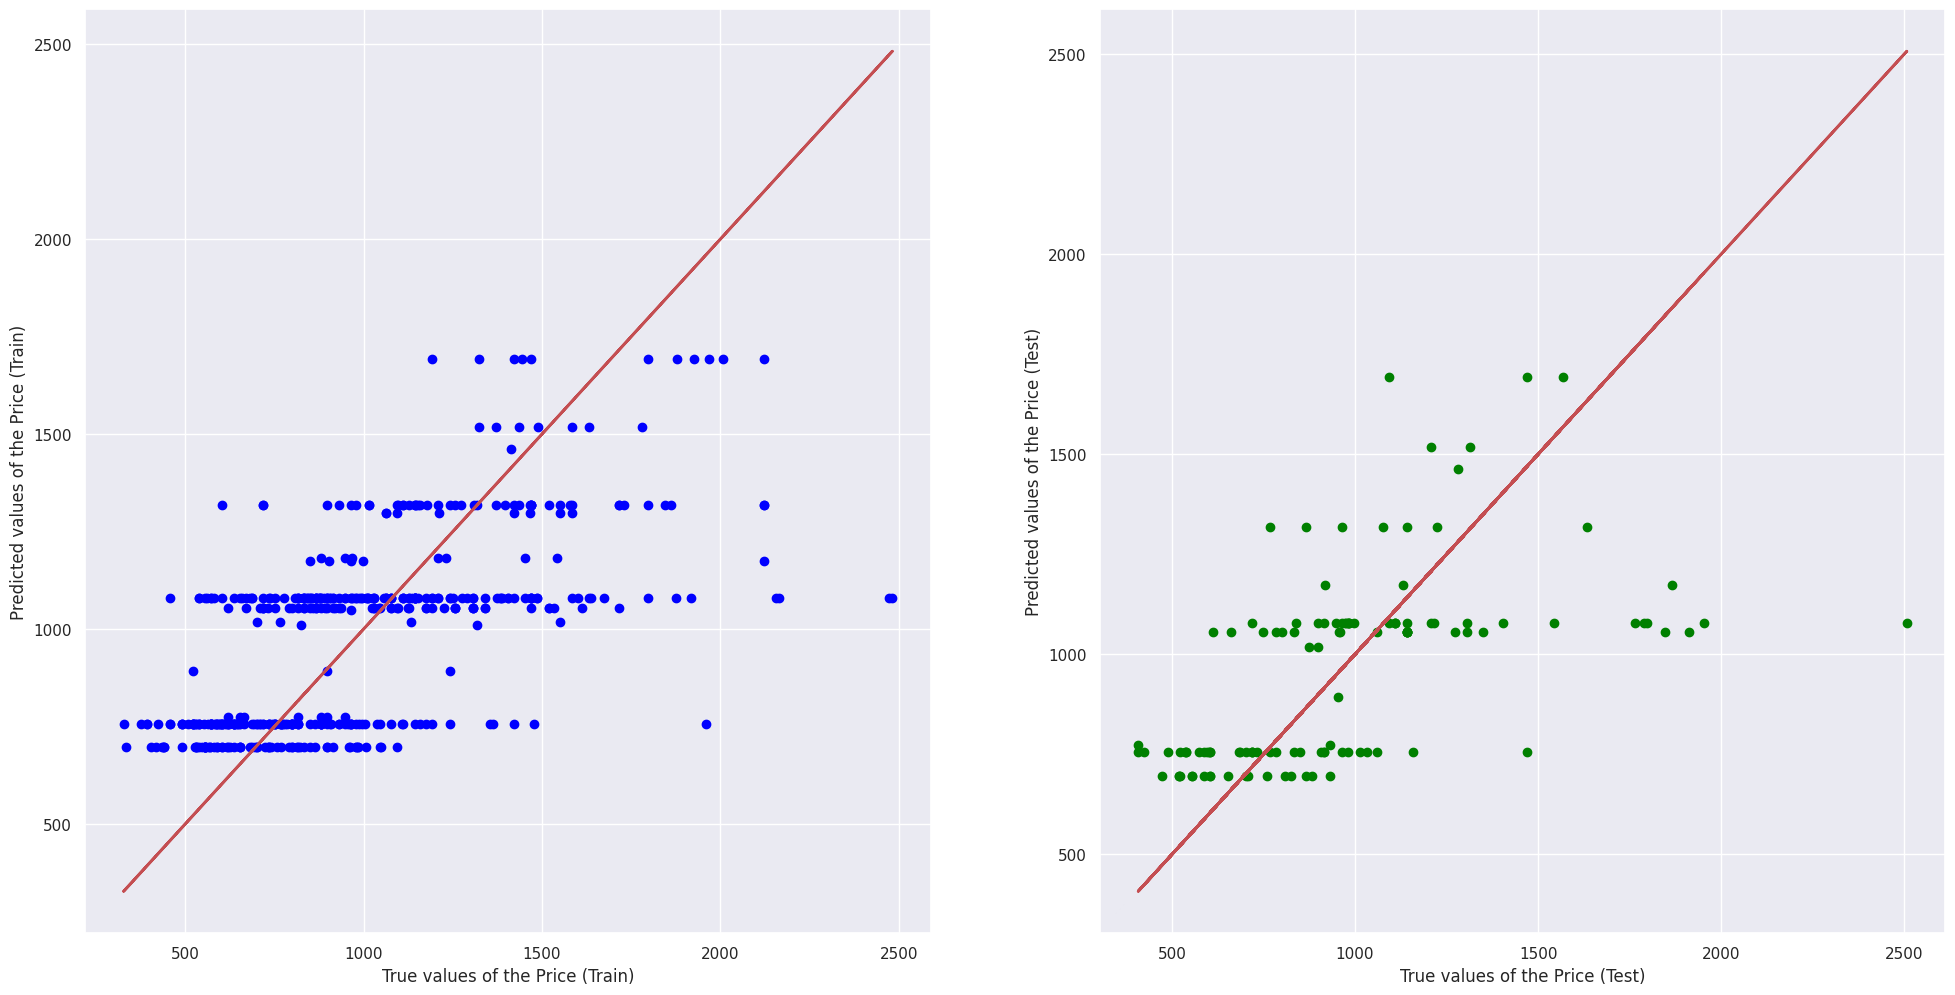

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_no_out, y_train_no_out_pred, color = "blue")
axes[0].plot(y_train_no_out, y_train_no_out, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Price (Train)")
axes[0].set_ylabel("Predicted values of the Price (Train)")
axes[1].scatter(y_test_no_out, y_test_no_out_pred, color = "green")
axes[1].plot(y_test_no_out, y_test_no_out, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Price (Test)")
axes[1].set_ylabel("Predicted values of the Price (Test)")
plt.show()

In [ ]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", ranforest.score(X_train_no_out, y_train_no_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_no_out, y_train_no_out_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", ranforest.score(X_test_no_out, y_test_no_out))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_no_out, y_test_no_out_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4072310018481684
Mean Squared Error (MSE) 	: 85261.85468707916

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3073319572071812
Mean Squared Error (MSE) 	: 96554.4666831208



After we remove outliers from our data and surprisingly find that the goodness of fit becomes worse. It might be due to several reason.

1. **Bias:** The model may have been influenced by the extreme values, leading to better fit by capturing those data points. Removing them can cause the model to fit the remaining data more broadly, which might not align with the model's expectations or result in a loss of information.
2. **Non-Linear Relationships:** Outliers might represent complex, non-linear relationships in the data that the model was previously accounting for.
3. **Reduced Sample Size:** Removing outliers can reduce the sample size of the data, which can negatively affect model performance, especially in complex models that require more data points for accurate training.

Since we have worse goodness of fit after removing the outliers, we will be using the random forest before removing the outliers.

## **3. Voting Regressor**

 A Voting Regressor is an ensemble machine learning technique used for regression tasks. It combines multiple individual regression models to make predictions. Each individual model contributes a prediction, and the final prediction is typically the average (or weighted average) of these individual predictions.

 First, import the necessary libraries:

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


Then, split the data into training and testing sets:

In [ ]:
X = laptopData_combined.drop('Price', axis=1)  # Features
y = laptopData_combined['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Creating Individual Regressors**

In [ ]:
linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)


**Creating the Voting Regressor object**

In [ ]:
voting_regressor = VotingRegressor(estimators=[('lr', linear_regressor), ('rf', rf_regressor), ('dt', dt_regressor)])


Fitting the voting regressor to the training data

In [ ]:
voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('dt', DecisionTreeRegressor(random_state=42))])

Making predictions on both the training and testing data sets

In [ ]:
y_train_pred_voting = voting_regressor.predict(X_train)
y_test_pred_voting = voting_regressor.predict(X_test)


**Evaluating performance of model**

In [ ]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", voting_regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_voting))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", voting_regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_voting))
print()


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8217318167920208
Mean Squared Error (MSE) 	: 182002.3244080463

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7028083943550116
Mean Squared Error (MSE) 	: 332488.24020093115



**Visualising actual vs predicted values for training and test set**

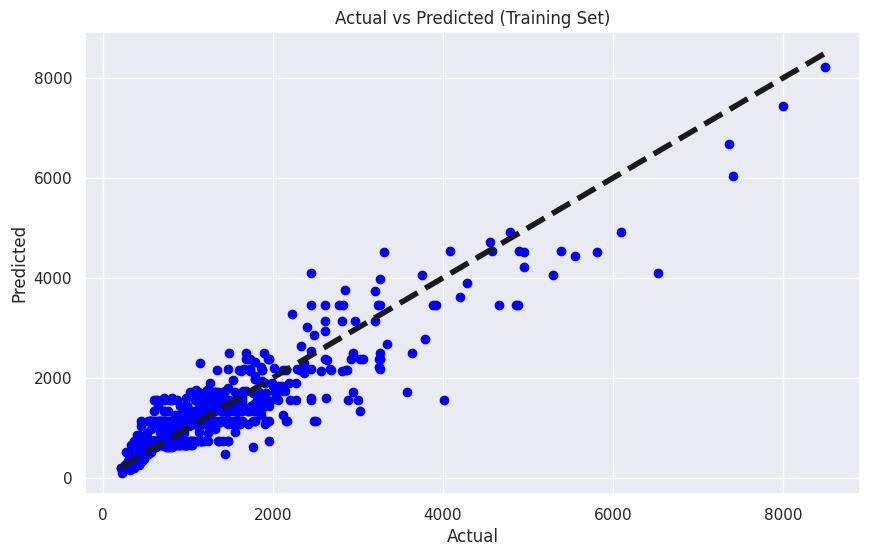

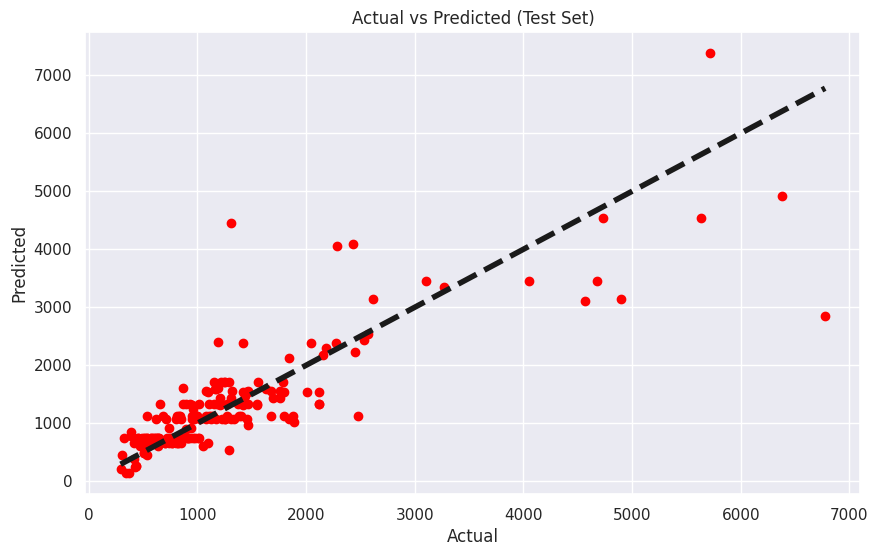

In [ ]:
# Visualize actual vs predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_voting, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training Set)')
plt.show()

# Visualize actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_voting, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test Set)')
plt.show()

**Training Set**: The scatter plot for the predicted value(blue dots) shows a very tight fit, with most of the predicted values lying close to the true values(black dotted line), particularly in lower prices region. This indicates a very good fit on the training set, but such a tight fit can sometimes be a sign of overfitting.

**Testing Set**: The scatter plot for the predicted value(red dots) deviate more from the true value(black dotted line) compared to the training set. The deviation is particularly high for higher prices value, suggesting the model has room for improvement in generalizing to new data or that higher price laptop models are outliers.

- **R-squared**: The R-squared values are 0.822 for the training set and 0.704 for the test set. The higher value in training set suggests that the model fits the training data extremely well but does not perform as well on the test data, which is unusual and might be due to potential overfitting.

- **Mean Squared Error (MSE)**: The MSE values are 182002.32 for training set and 332488.24 for the test set. The much lower MSE in training set also suggested that the model perform better on training set compared to test set, which contribute to a higher chance of overfitiing.

The results obtained from voting regressor are very similar to that obtained from random forest. This could be due to voting regressor being trained with the random forest model.

---

# **Price Predictor using ram, storage, and vertical_pixel**

We used random forest to as the model to predict price using the 3 factors, ram size, storage size and vertical pixel. We used random forest as it has the highest explained variance of all models so it should give the most accurate results.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Selecting relevant features and target variable
features = ['RAM_GB', 'Storage_capacity_GB', 'Vertical_pixel']
target = 'Price'

# Preparing data for modeling
X = laptopData_combined[features]
y = laptopData_combined[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training RMSE:", train_rmse)

y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Testing RMSE:", test_rmse)

# Function to predict price based on user input
def predict_price(RAM_GB, Storage_capacity_GB, Vertical_pixel, model):
    # Create a DataFrame with user input
    user_input = pd.DataFrame({
        'RAM_GB': [RAM_GB],
        'Storage_capacity_GB': [Storage_capacity_GB],
        'Vertical_pixel': [Vertical_pixel]
    })

    # Make prediction
    predicted_price = model.predict(user_input)
    return predicted_price[0]

# Example usage
def main():
    # Get user input
    RAM_GB = float(input("Enter RAM size in GB: "))
    Storage_capacity_GB = float(input("Enter storage capacity in GB: "))
    Vertical_pixel = int(input("Enter vertical pixel resolution: "))

    # Predict price
    predicted_price = predict_price(RAM_GB, Storage_capacity_GB, Vertical_pixel, model)

    print("Predicted Price:", predicted_price)

if __name__ == "__main__":
    main()


Training RMSE: 465.324140696853
Testing RMSE: 596.6339169151588


---
# **Conclusion**
From our analysis, we found that for the numerical predictors we have used, RAM size, storage capacity and Vertical Pixel Resolution all have strong positive correlation with price compared to other predictors.

For categorical, laptops with SSD have a larger median price than laptops with hard disk. Intel Cpu's also have higher median price than AMD Cpu's while Touch Screen laptops also have a higher median price than laptops without touch screen. This can imply that these factors have a bigger influence on price than its counterparts.

Overall, the predictors above have a big influence on price and could be due to consumers thinking that a better laptop is a laptop with one that includes these factors inside.


For our second problem definition, from our analysis we see that random forest model gives us the highest explained variance and lowest mean square error. As it has the highest prediciton accuracy from this analysis, we believe random forest model to be the best model in predicting laptop price.